In [1]:
%%capture
%pip install plotly pandas numpy matplotlib seaborn ipympl itables
%pip install 

# Common code and variables

In [2]:
%matplotlib widget

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
# Use the pgf backend (must be set before pyplot imported)
# mpl.use('pgf')
from matplotlib import pyplot as plt, ticker

import seaborn as sns
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

plt.style.use('seaborn')

width = 800

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family":  "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 17,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

<IPython.core.display.Javascript object>

/tmp/ipykernel_481835/332237666.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    elif width == 'acm':
        width_pt = 506.295
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 + 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in / golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [4]:
databases = { 'ClickhouseDB': '#orange',
             'ClickHouse': '#orange',
              'DatalayertsDB': '#75BDA7', 
              'TimescaleDB': '#c78181', 
              'InfluxDB': '#c78351',
              'PostgresDB':'orange',}
databases_modes = { 'ClickhouseDB_dedicated_regular': '#75BBA1',
             'ClickhouseDB_dedicated_irregular': '#c77581',
              'DatalayertsDB_dedicated_regular': '#75BDA7', 
              'DatalayertsDB_dedicated_irregular': '#75BBA1', 
              'TimescaleDB_dedicated_regular': '#c78181', 
             'TimescaleDB_dedicated_irregular': '#c78242', 
              'InfluxDB_dedicated_regular':'#8371ff',
              'InfluxDB_dedicated_irregular':'#8381rr',
               'PostgresDB_dedicated_regular':'#8791ff',
              'PostgresDB_dedicated_irregular':'#8791rr',
              'DummyDB_dedicated_regular':'#8791ff',
              'DummyDB_dedicated_irregular':'#8791rr'}
databases_dims = {
    'ClickhouseDB_1': '#8791rr',
             'InfluxDB_1': '#8791rr',
              'DatalayertsDB_1': '#75BDA7', 
              'TimescaleDB_1': '#c78181', 
              'PostgresDB_1':'8791rr',
}
labels = { 'ClickhouseDB': 'ClickHouse',
              'InfluxDB': 'InfluxDB', 
          'PostgresDB':'PostgreSQL',    
          'TimescaleDB': 'TimescaleDB',
          'DatalayertsDB': 'DatalayerTS',
              }
labels_dims = { 'ClickhouseDB_1': 'ClickHouse 1Dim',
              'InfluxDB': 'InfluxDB', 
          'PostgresDB':'PostgreSQL',    
          'TimescaleDB': 'TimescaleDB',
          'DatalayertsDB': 'DatalayerTS',
              }
labels_modes = {'ClickhouseDB_dedicated_regular': 'ClickhouseDB_dedicated_regular',
             'ClickhouseDB_dedicated_irregular': 'ClickhouseDB_dedicated_irregular',
              'DatalayertsDB_dedicated_regular': 'DatalayertsDB_dedicated_regular', 
              'DatalayertsDB_dedicated_irregular': 'DatalayertsDB_dedicated_irregular', 
              'TimescaleDB_dedicated_regular': 'TimescaleDB_dedicated_regular', 
             'TimescaleDB_dedicated_irregular': 'TimescaleDB_dedicated_irregular', 
              'PostgresDB_dedicated_regular':'PostgresDB_dedicated_regular',
              'PostgresDB_dedicated_irregular':'PostgresDB_dedicated_irregular',
              'DummyDB_dedicated_regular':'DummyDB_dedicated_regular',
              'DummyDB_dedicated_irregular':'DummyDB_dedicated_irregular',
                'InfluxDB_dedicated_regular':'InfluxDB_dedicated_regular',
              'InfluxDB_dedicated_irregular':'InfluxDB_dedicated_irregular',
              }
modes = {
    'dedicated_irregular': '#f5700a',
             'dedicated_regular': '#8791ff',
              'mixed_irregular': '#75BDA7', 
              'mixed_regular': '#c78181', 
}
color_discrete_map_extra = { 'ClickhouseDB': 'grey', 
                            'InfluxDB': '#c78181', 
                            'TimescaleDB': 'grey', 
                            'InfluxDBExtended' : '#orange' }
colnamesRead = ['Date','SucceededDataPoints','FailedDataPoints',
                'Operation','Latency','Mode','TargetDatabase','Client','ClientsNumber','SensorsNumber','ContentStartDate',
                'Duration','Iteration','Aggregations','Dimensions'] 

colnamesWrite = ['Date','SucceededDataPoints','FailedDataPoints',
                'Operation','Latency','Mode','TargetDatabase','Client','ClientsNumber','SensorsNumber','ContentStartDate',
                'BatchSize','Iteration','Dimensions'] 
colnames  = ['Date','SucceededDataPoints','FailedDataPoints','Operation','Latency','Mode','WLPercentage','TargetDatabase','Client','ClientsNumber','SensorsNumber','StartDate','BatchSize','Duration','Iteration','Aggregation','Dimensions'] 


syscolnames = ['Timestamp','Database','Operation','ClientsNumber','BatchSize','Dimensions','Percentage','SensorsNumber','Mode','CpuTotal','CpuSystem','CpuUser','CpuIOWait','CpuContextSwitches','CpuSysCalls','MemActive','MemAvailable','MemBuffers','MemCached','MemFree','MemInActive','MemTotal','MemShared','MemUsed','SwapFree','SwapSin','SwapSout','SwapTotal','SwapUsed','DiskReadBytes','DiskReadCount','DiskWriteBytes','DiskWriteCount','FsDeviceName','FsFree','FsFs_Type','FsKey','FsMnt_Point','FsPercent','FsSize','FsUsage','NetworkCumulativeConnections','NetworkCumulativeReceives','NetworkCumulativeTransmissions','NetworkConnections','NetworkTransmissions','NetworkReceives','NetworkIsUp','NetworkSpeed','ProcessCpuPercent','ProcessCpuTimes','ProcessIOCounters','ProcessMemoryInfo','ProcessMemoryPercent','ProcessThreadsNumber','ProcessStatus']
 



legend_kwargs = dict(borderpad=0.5, frameon=True, framealpha=1, facecolor='white', edgecolor='#F5F5F5', ncol=2, title=None)

 

In [5]:
## System Metrics Helpers
def to_megabytes(x):
    return x / 1e6

def to_mbps(x):
    return x * 8 / 1e6

def used_mem(x):
    l =  x * 100 / 32e9
    return l

def plot_database(ax, data, key, func, x=None, label=None):
    if func == 'log':
        ax.set_yscale('log')
    elif callable(func):
        data = func(data)
    if x is None:
        x = pd.Series(range(len(data)))
    return ax.plot(x, data, label=label, color=databases[key])

## create tables

In [7]:
# metrics
results = pd.merge(resultsR, resultsW, how='outer')
# , on=colnames, left_on=None, right_on=None,
#          left_index=False, right_index=False, sort=True,
#          suffixes=('_R', '_W'), copy=True, indicator=False,
#          validate=None).reset_index() 

results['Date'] =  pd.to_datetime(results['Date'], unit='ms' , errors = 'coerce' )
results['Latency'] = pd.to_numeric(results['Latency'], errors = 'coerce')
results['BatchSize'] = pd.to_numeric(results['BatchSize'], errors = 'coerce')
results['Dimensions'] = pd.to_numeric(results['Dimensions'], errors = 'coerce')

results['ClientsNumber'] = pd.to_numeric(results['ClientsNumber'], errors = 'coerce')
results['SucceededDataPoints'] = pd.to_numeric(results['SucceededDataPoints'] , errors = 'coerce' )
results  = results.sort_values(by=['TargetDatabase', 'Date' ]).loc[results['Latency'] > 0 ].loc[results['Dimensions'] > 0 ].loc[results['SucceededDataPoints'] > 0 ]
results['Regularity']= results['Mode'].str.extract('\_(.*)', expand=False)
results = results.assign(ValueArrays=lambda x: x.SucceededDataPoints * x.ClientsNumber ) 


database_groups = results.set_index('Date').groupby(['TargetDatabase', 'Mode','Operation','ClientsNumber', 'BatchSize','Duration', 'Dimensions'] , as_index=False, dropna=False) # 


results_rates =  database_groups.agg(
    {  "Latency":'mean' , "ValueArrays":'mean'  }# APPRxMBpS  :  MS to S -> DataArrays*Dimensions =Dtapaints. ->  double to Byte -> byte to MB  IMPORTANT!! DLTS stores Double, so practically doubles the ingestion
    ).assign(ValuePoints=lambda x:  x.ValueArrays * x.Dimensions
   ).assign(PointsPerMS = lambda x: x.ValuePoints  / x.Latency 
   ).assign(ApprxMBpS=lambda x:  (x.PointsPerMS * 8 / 1000000  ) * 1000
   )

results_rate_with_DummyDB = results_rates
results_rates=results_rates.loc[results_rates['TargetDatabase'] != "DummyDB" ]
  
top_rates= results_rates.groupby(['TargetDatabase', 'Mode','BatchSize','ClientsNumber','Dimensions'], as_index=False)['ApprxMBpS'].max().groupby(['TargetDatabase', 'Mode'], as_index=False , group_keys=True)['ApprxMBpS'].max().merge( results_rates)

results_ratesW=results_rates.loc[results_rates['Operation'].str.contains('Ingestion')] 
result_ratesR=results_rates.loc[results_rates['Operation'].str.contains('Query')] 

In [8]:
# system metrics
# systemmetrics = pd.read_csv('/mnt/unison-box/dropbox/Coop-projekte/kit-ipe-sciTS/gitrepo/my-opi-git/SciTS/Glances17-11.csv', sep=",",  names = syscolnames, on_bad_lines = 'warn' )
systemmetrics['Timestamp'] =  pd.to_datetime(systemmetrics['Timestamp'], unit='ms' , errors = 'coerce' )
systemmetrics['Dimensions'] =  pd.to_numeric(systemmetrics['Dimensions'] , errors = 'coerce' )
systemmetrics['BatchSize'] =  pd.to_numeric(systemmetrics['BatchSize'] , errors = 'coerce' )
systemmetrics['ClientsNumber'] =  pd.to_numeric(systemmetrics['ClientsNumber'] , errors = 'coerce' )
systemmetrics['DiskWriteCount'] =  pd.to_numeric(systemmetrics['DiskWriteCount'] , errors = 'coerce' )
systemmetrics["CpuTotal"]= pd.to_numeric(systemmetrics["CpuTotal"], errors = 'coerce' )
systemmetrics["CpuContextSwitches"]= pd.to_numeric(systemmetrics["CpuContextSwitches"], errors = 'coerce' )
systemmetrics["MemActive"]= pd.to_numeric(systemmetrics["MemActive"], errors = 'coerce' )
systemmetrics["MemUsed"]= pd.to_numeric(systemmetrics["MemUsed"], errors = 'coerce' )
systemmetrics["MemCached"]= pd.to_numeric(systemmetrics["MemCached"], errors = 'coerce' )
systemmetrics["SwapUsed"]= pd.to_numeric(systemmetrics["SwapUsed"], errors = 'coerce' )
systemmetrics["DiskReadBytes"]= pd.to_numeric(systemmetrics["DiskReadBytes"], errors = 'coerce' )
systemmetrics["DiskReadCount"]= pd.to_numeric(systemmetrics["DiskReadCount"], errors = 'coerce' )
systemmetrics["DiskWriteBytes"]= pd.to_numeric(systemmetrics["DiskWriteBytes"], errors = 'coerce' )
systemmetrics["DiskWriteCount"]= pd.to_numeric(systemmetrics["DiskWriteCount"], errors = 'coerce' )
systemmetrics["FsSize"]= pd.to_numeric(systemmetrics["FsSize"], errors = 'coerce' )
systemmetrics["FsFree"]= pd.to_numeric(systemmetrics["FsFree"], errors = 'coerce' )

/tmp/ipykernel_481835/3053549496.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  systemmetrics['Timestamp'] =  pd.to_datetime(systemmetrics['Timestamp'], unit='ms' , errors = 'coerce' )


# Ingestion Scenarios




## ingestion rate
### regular vs irregular: 

first violin plot for each ClientsNumber per Database, then Bachsize per Database. After each graph a table with the mean values


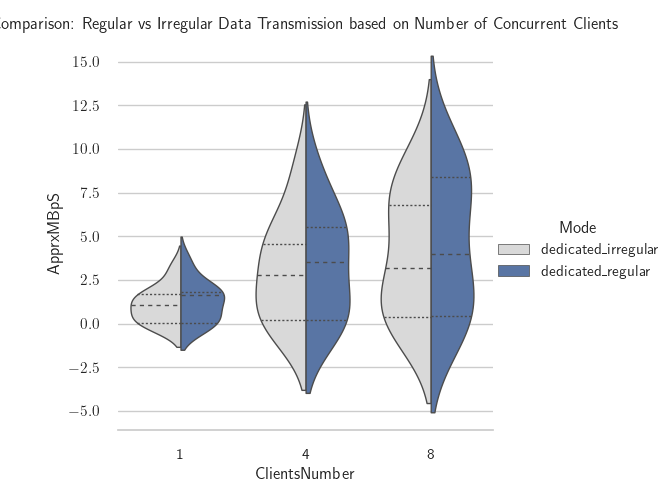

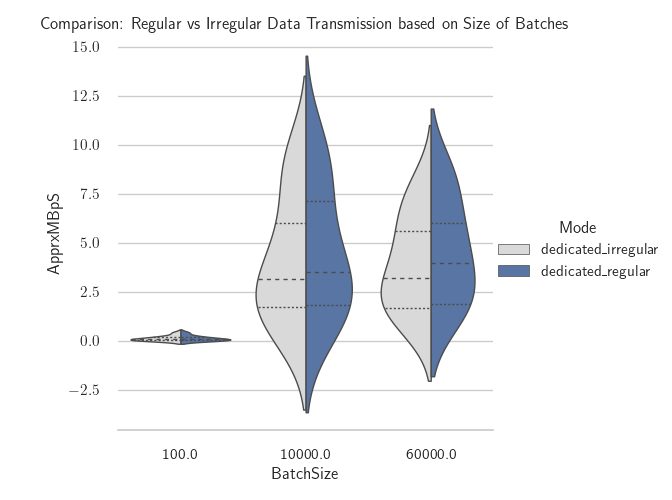

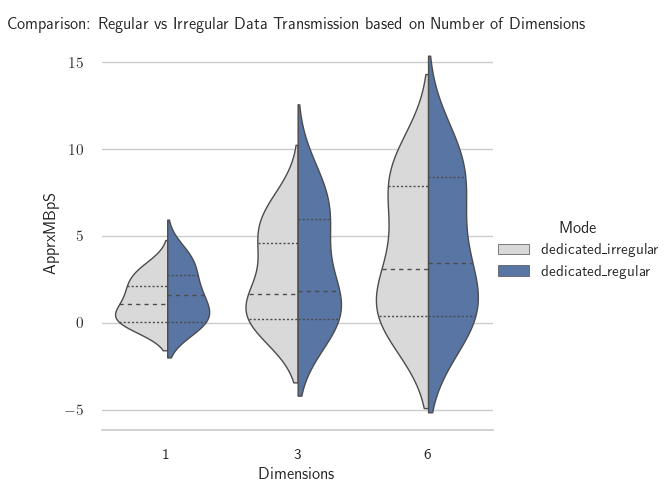

Stdev for CLientsNumber and Batchsize


TOP RATES and their resp. CLientsNumbers and Batchsizes


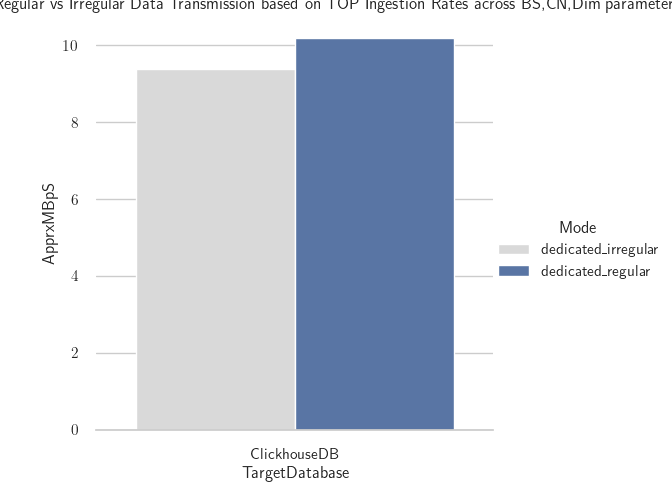

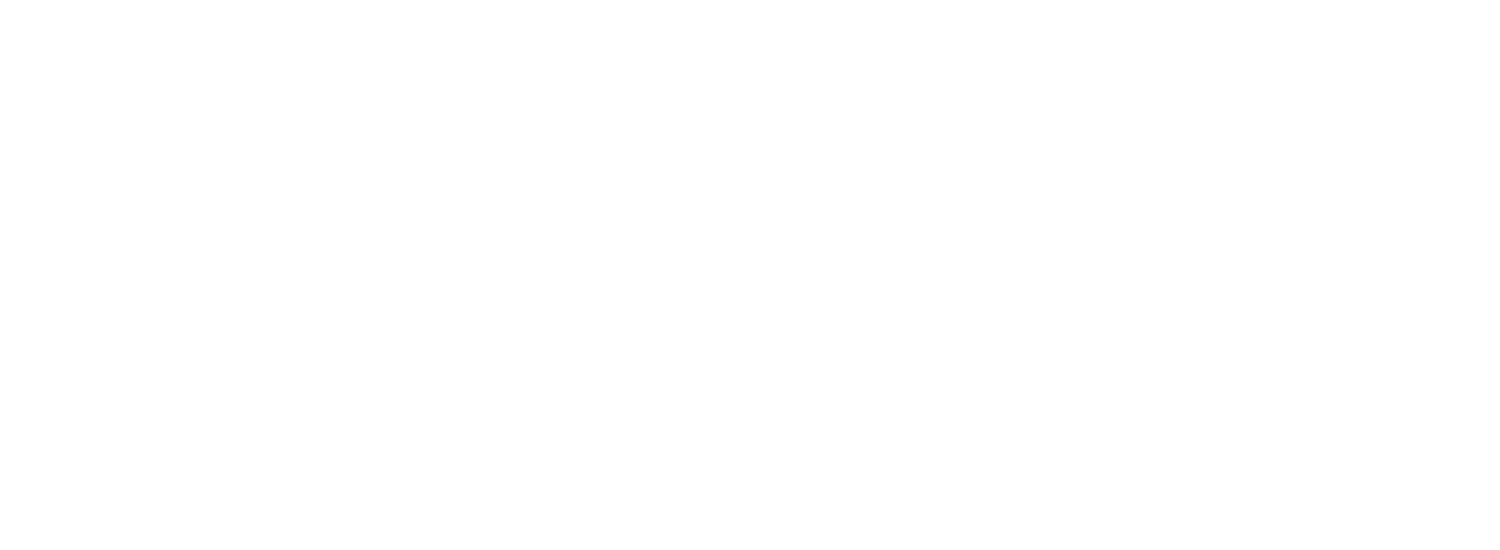

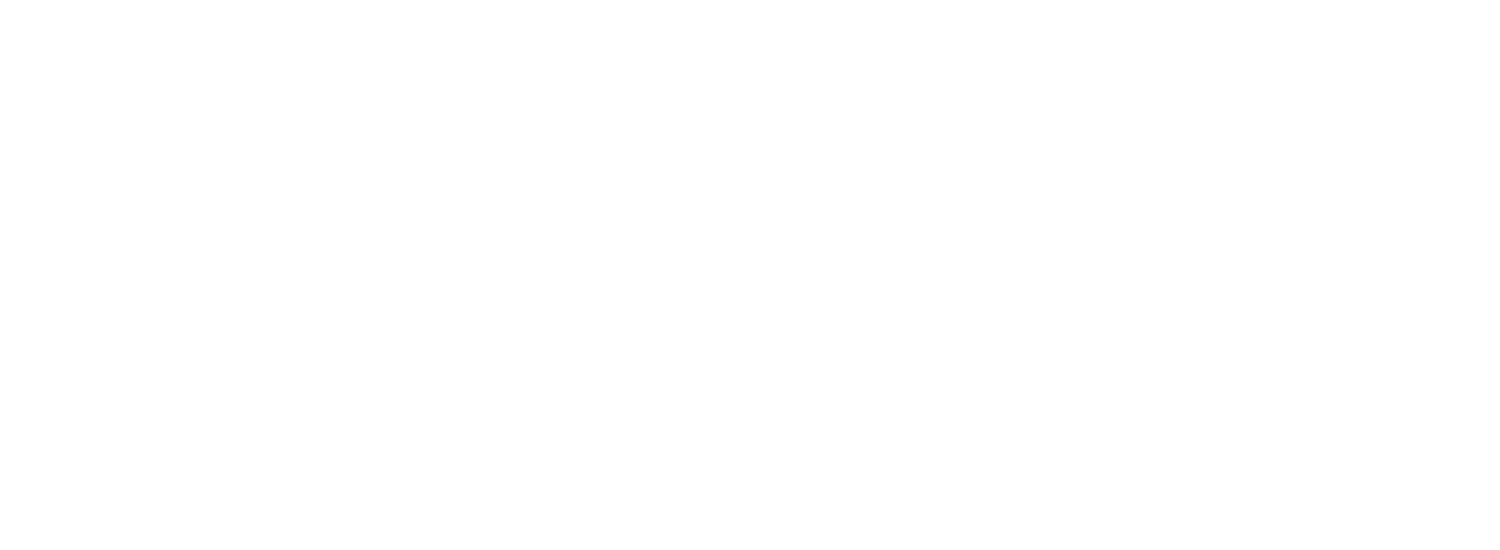

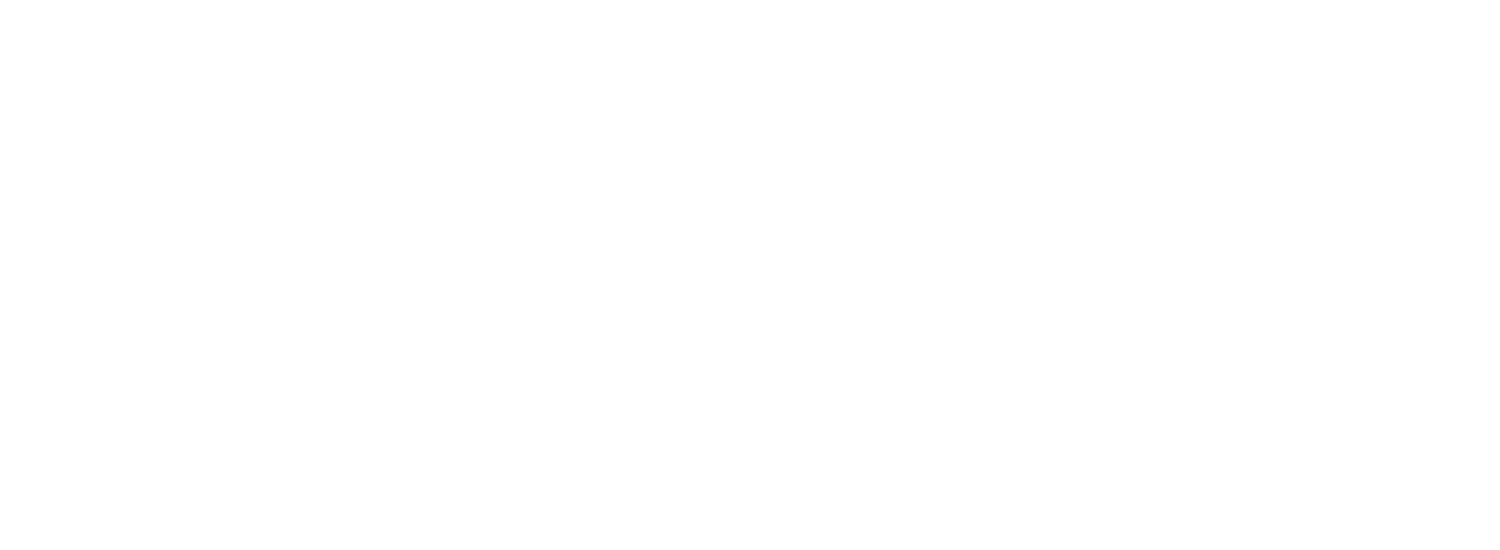

In [9]:
regularity_ingestion_rates=results_ratesW.loc[results_ratesW.Mode.str.contains('dedicated_') ] 
   


print("first violin plot for each ClientsNumber per Database, then Bachsize per Database. After each graph a table with the mean values")
# violin plot

import seaborn as sns
sns.set_theme(style="whitegrid")


#ClientsNumber
# fig, ax = plt.subplots()
plt.figure("CN" ).set_figwidth(15)
sns.catplot(data=regularity_ingestion_rates,kind='violin', x="ClientsNumber", y="ApprxMBpS", hue="Mode",col="TargetDatabase",
               split=True, inner="quart", linewidth=1, 
               palette={"dedicated_regular": "b", "dedicated_irregular": ".85"})
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Data Transmission based on Number of Concurrent Clients")
plt.show()
plt.savefig('./regularityCN-violin.pdf', format='pdf')
# plt.close()


agg_regularityCN= regularity_ingestion_rates.groupby(['TargetDatabase', 'Mode','ClientsNumber'], as_index=False).agg({  "ApprxMBpS":'mean'  })

show(pd.DataFrame(data=agg_regularityCN)) 




# #Batchsize
# fig2, ax2 = plt.subplots()
plt.figure("BS").set_figwidth(15)
sns.catplot(data=regularity_ingestion_rates,kind='violin', x="BatchSize", y="ApprxMBpS", hue="Mode", col="TargetDatabase",
                split=True, inner="quart", linewidth=1, 
                palette={"dedicated_regular": "b", "dedicated_irregular": ".85"})
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Data Transmission based on Size of Batches")
plt.show()
plt.savefig('./regularityBS-violin.pdf', format='pdf')
# plt.close()

# DIMsize
# fig2, ax2 = plt.subplots()
plt.figure("BS").set_figwidth(15)
sns.catplot(data=regularity_ingestion_rates,kind='violin', x="Dimensions", y="ApprxMBpS", hue="Mode", col="TargetDatabase",
                split=True, inner="quart", linewidth=1, 
                palette={"dedicated_regular": "b", "dedicated_irregular": ".85"})
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Data Transmission based on Number of Dimensions")
plt.show()
plt.savefig('./regularityDim-violin.pdf', format='pdf')
# plt.close()



agg_regularityBS= regularity_ingestion_rates.groupby(['TargetDatabase', 'Mode','BatchSize'], as_index=False).agg({  "ApprxMBpS":'mean'  })
show(pd.DataFrame(data=agg_regularityBS)) 




print("Stdev for CLientsNumber and Batchsize")
stdev_regularity=  regularity_ingestion_rates.groupby(['TargetDatabase', 'Mode','BatchSize']).agg({  "ApprxMBpS":'var'  }).rename(columns={'ApprxMBpS':'BS-VAR'}).join(regularity_ingestion_rates.groupby(['TargetDatabase', 'Mode','ClientsNumber']).agg({  "ApprxMBpS":'var'  }).rename(columns={'ApprxMBpS':'CN-VAR'}))
show(pd.DataFrame(data=stdev_regularity)) 




# # TOP Values    #   

print("TOP RATES and their resp. CLientsNumbers and Batchsizes")
show(pd.DataFrame(data=top_rates[top_rates['Mode'].str.contains('dedicated_') ])) 

plt.figure("TOP").set_figwidth(15)
sns.catplot(data= top_rates[top_rates['Mode'].str.contains('dedicated_') ] ,kind='bar', x="TargetDatabase", y="ApprxMBpS", hue="Mode", 
                #split=True , inner="quart", linewidth=1, 
                palette={"dedicated_regular": "b", "dedicated_irregular": ".85"})
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Data Transmission based on TOP Ingestion Rates across BS,CN,Dim parameters.")
plt.show()
plt.savefig('./regularityTOP.pdf', format='pdf')


### Multi Dim


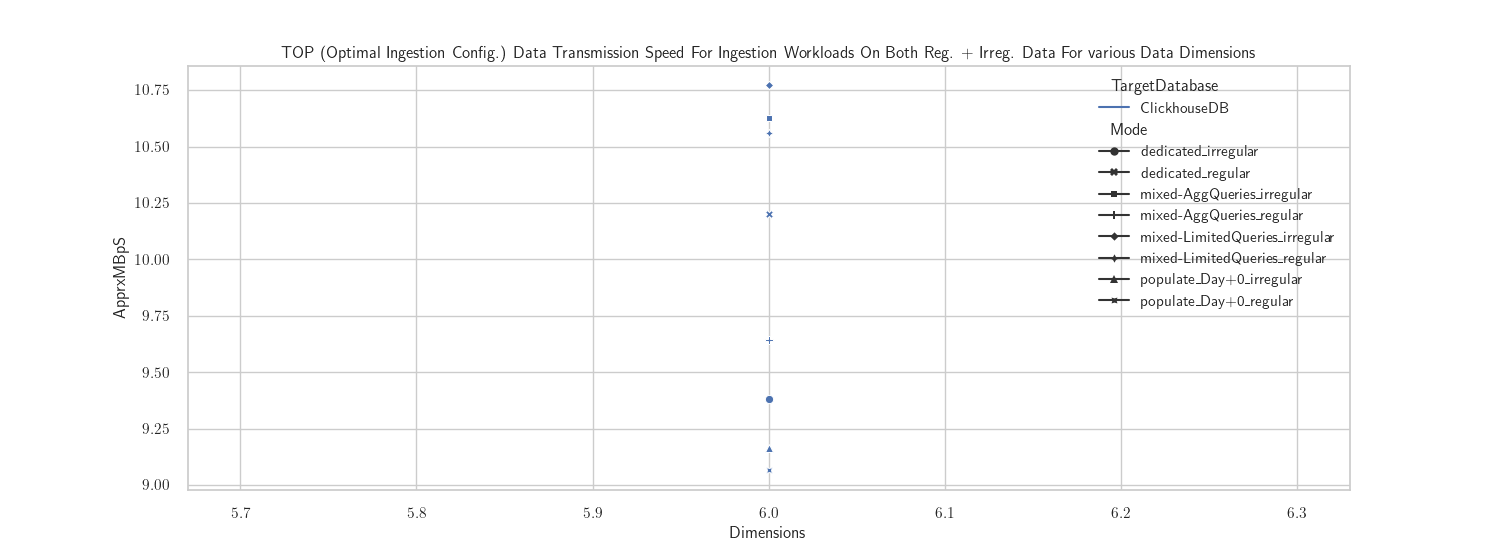

In [10]:

multidimIng_results= results_ratesW[results_ratesW['Mode'].str.contains('dedicated')]

multidimIng_TOP_all = multidimIng_results.merge(top_rates, how='right'    )
# TODO lineplot with variance  , 99% quantil . 1 % quantil or min and max ,, like a mix between barplot and lineplots


# plt.figure("multidim-TOP-I").set_figwidth(15)

# sns.boxplot(x="TargetDatabase", y="Latency",
#             hue="Dimensions", palette=["m", "g","b","r","y","w"],
#             data= multidimIng_TOP[multidimIng_TOP['Operation'].str.contains('Ingestion')] )
# sns.despine(offset=10, trim=True)
# plt.title("TOP (Optimal Ingestion Config.) Data Transmission Speed For Ingestion Workloads On Both Reg. + Irreg. Data For various Data Dimensions")

# plt.savefig('./multidim-TOP-I-groupedBP.pdf', format='pdf')
# plt.show()


plt.figure("multidim-TOP-I").set_figwidth(15)
plt.title("TOP (Optimal Ingestion Config.) Data Transmission Speed For Ingestion Workloads On Both Reg. + Irreg. Data For various Data Dimensions")

sns.lineplot(data=multidimIng_TOP_all, x="Dimensions", y="ApprxMBpS", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.savefig('./multidim-TOP-I-linep.pdf', format='pdf')
plt.show()


#  TODO Multidim between big batch size and dim number: compare the speed on basis of Datapoints transfered, or with more onedim big-batches, or with smallbatch,highdim



##  Ing System Metrics


In [11]:
from datetime import datetime as dt
import math

 
print(systemmetrics.dtypes)
systemmetrics=systemmetrics.drop(['FsDeviceName','FsFs_Type','FsKey','FsMnt_Point'], axis=1)
 
 
 
 ### here a graph for mem and cpu over time from first TS of DatabaseOperationMode to Last. TODO

Timestamp                         datetime64[ns]
Database                                  object
Operation                                 object
ClientsNumber                            float64
BatchSize                                float64
Dimensions                               float64
Percentage                                object
SensorsNumber                             object
Mode                                      object
CpuTotal                                 float64
CpuSystem                                 object
CpuUser                                   object
CpuIOWait                                 object
CpuContextSwitches                       float64
CpuSysCalls                               object
MemActive                                float64
MemAvailable                              object
MemBuffers                                object
MemCached                                float64
MemFree                                   object
MemInActive         

### regurlar vs irregular transaction system usage 


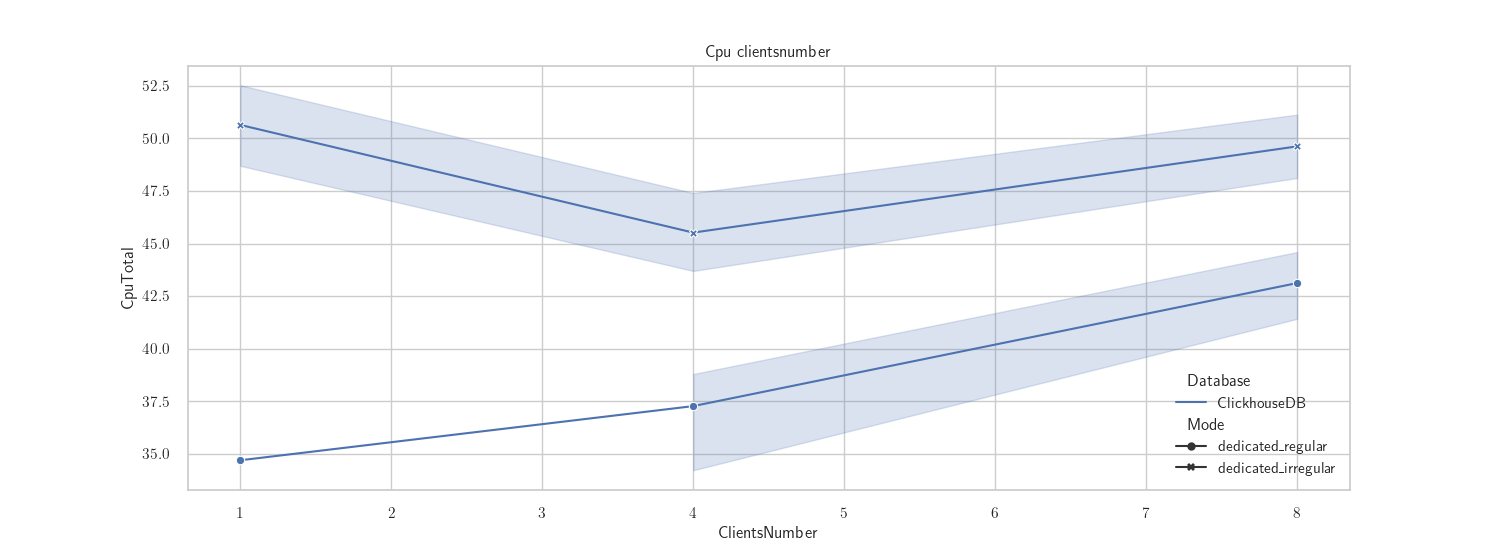

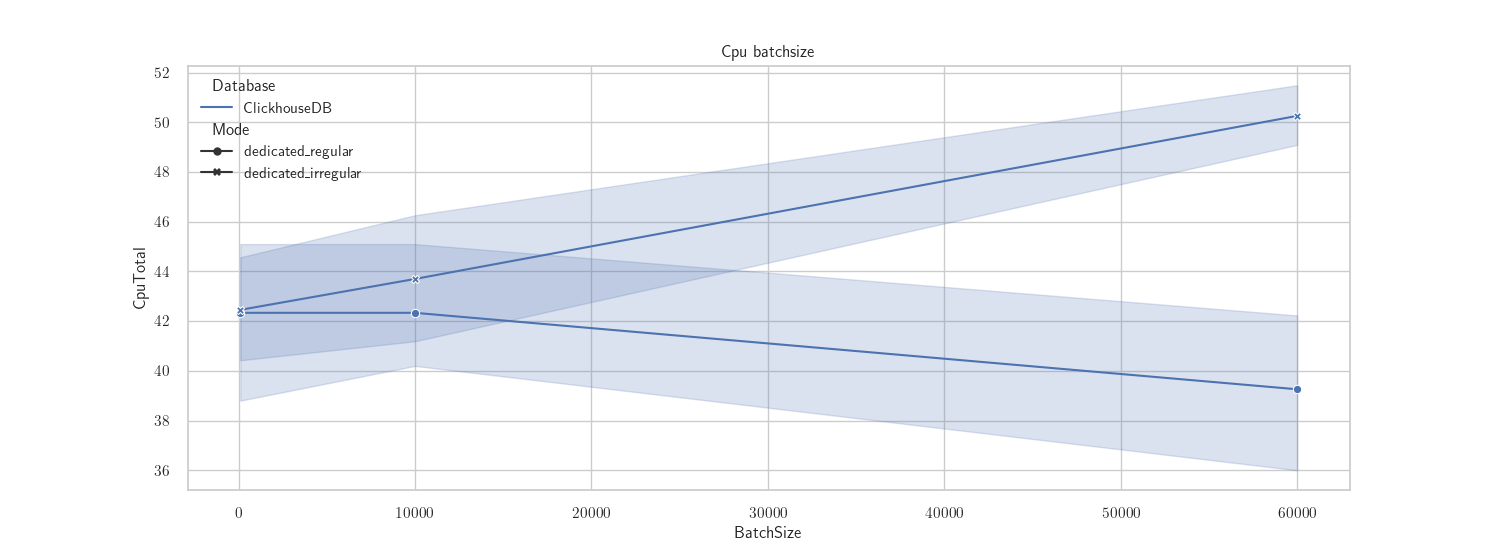

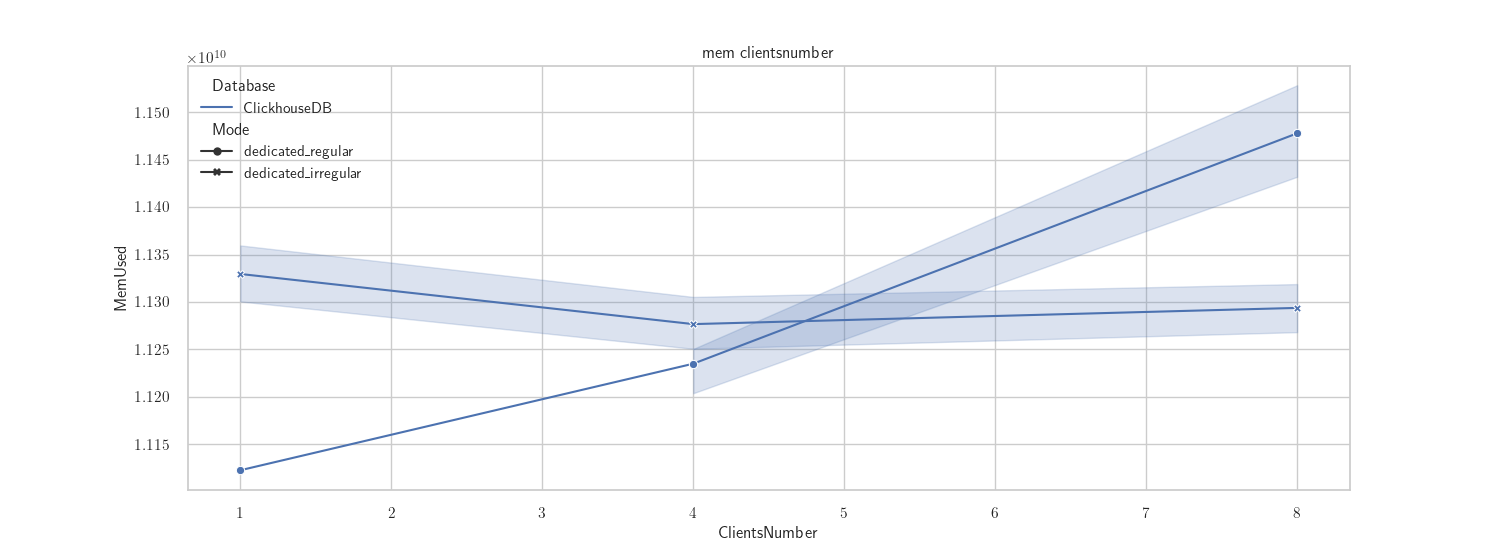

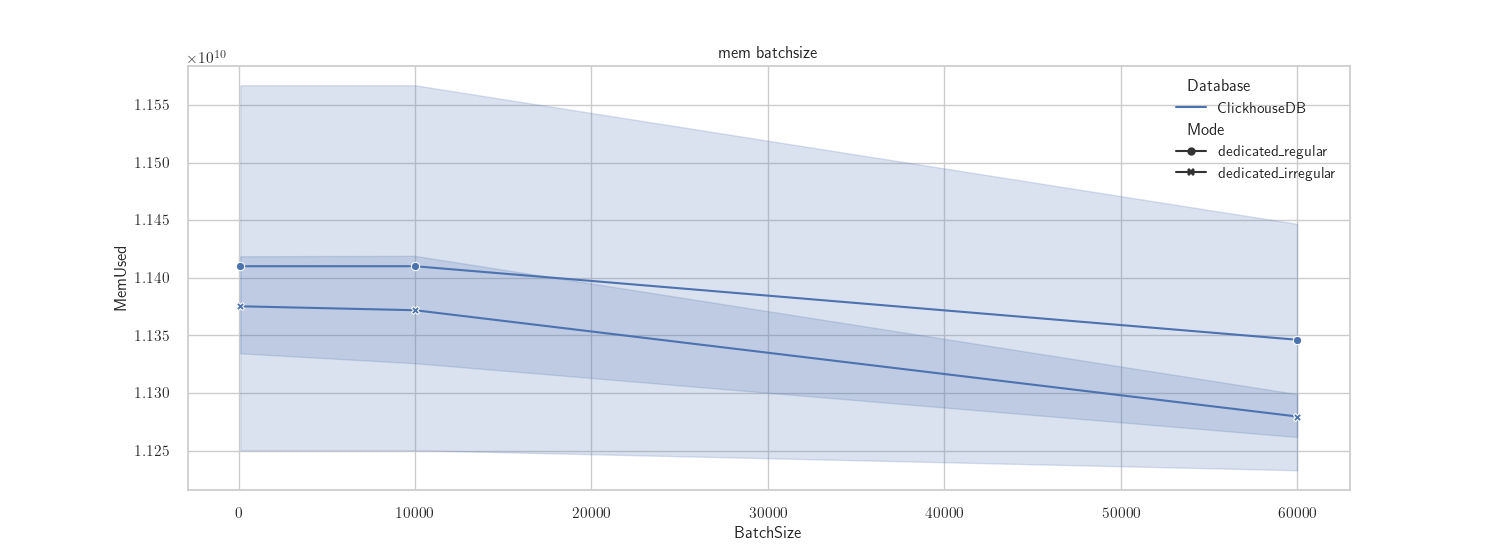

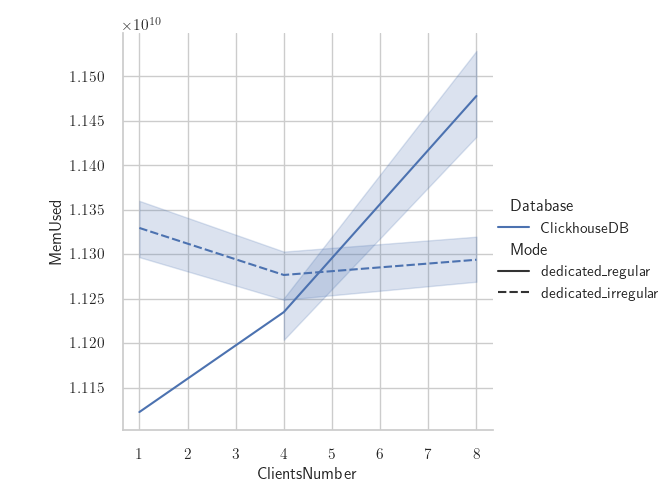

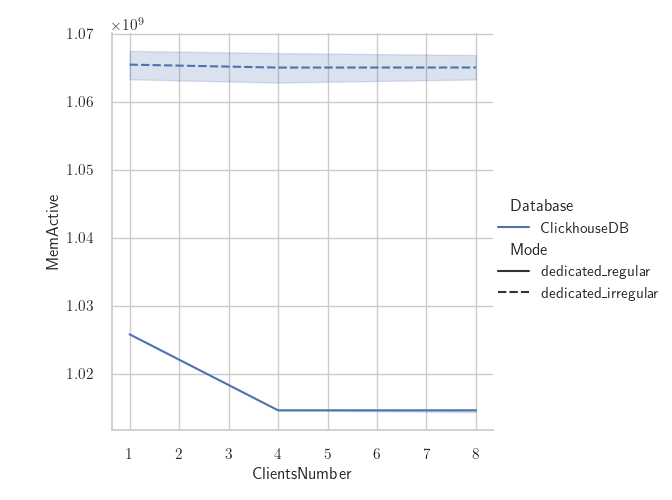

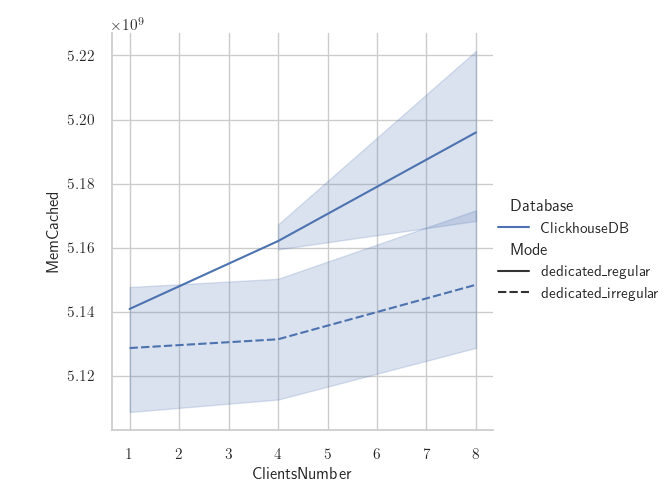

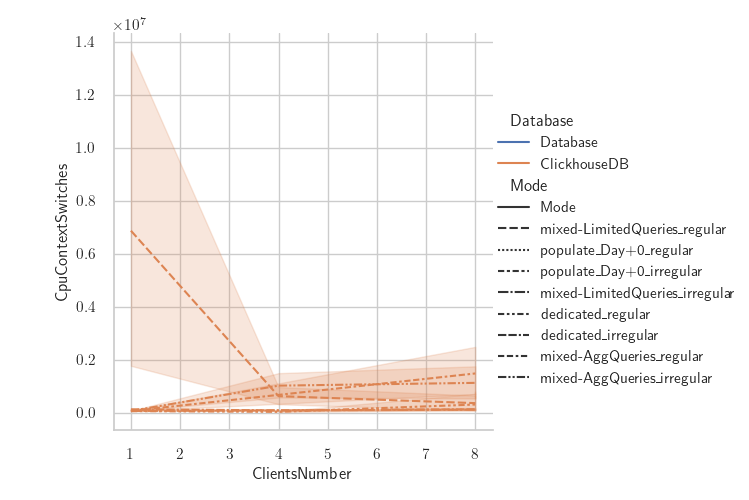

/tmp/ipykernel_481835/1493935869.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure("swap ").set_figwidth(15)


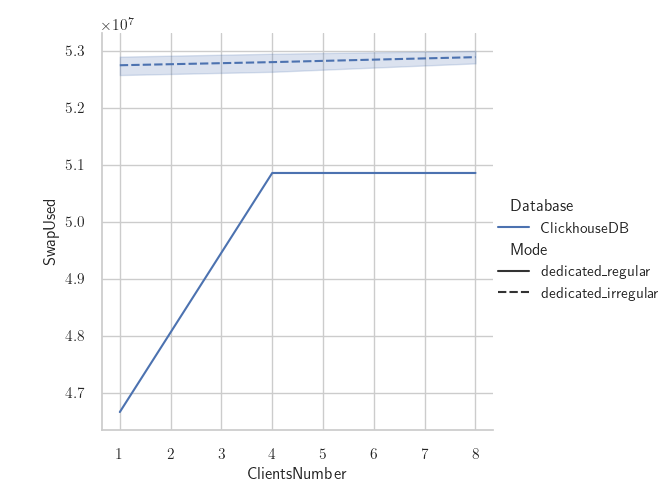

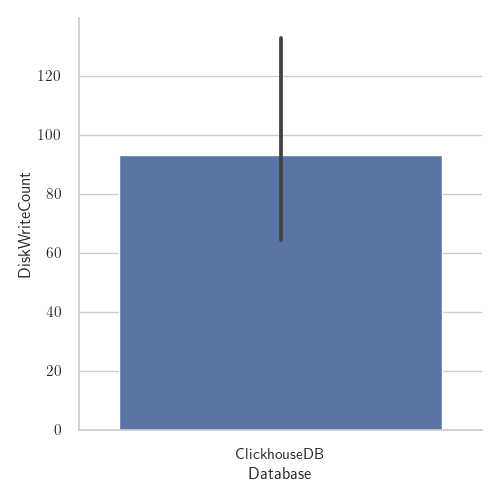

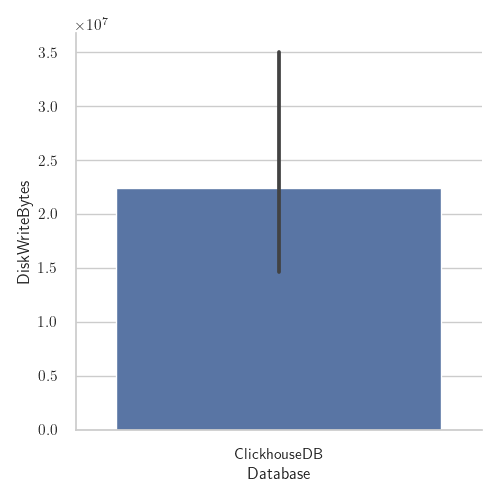

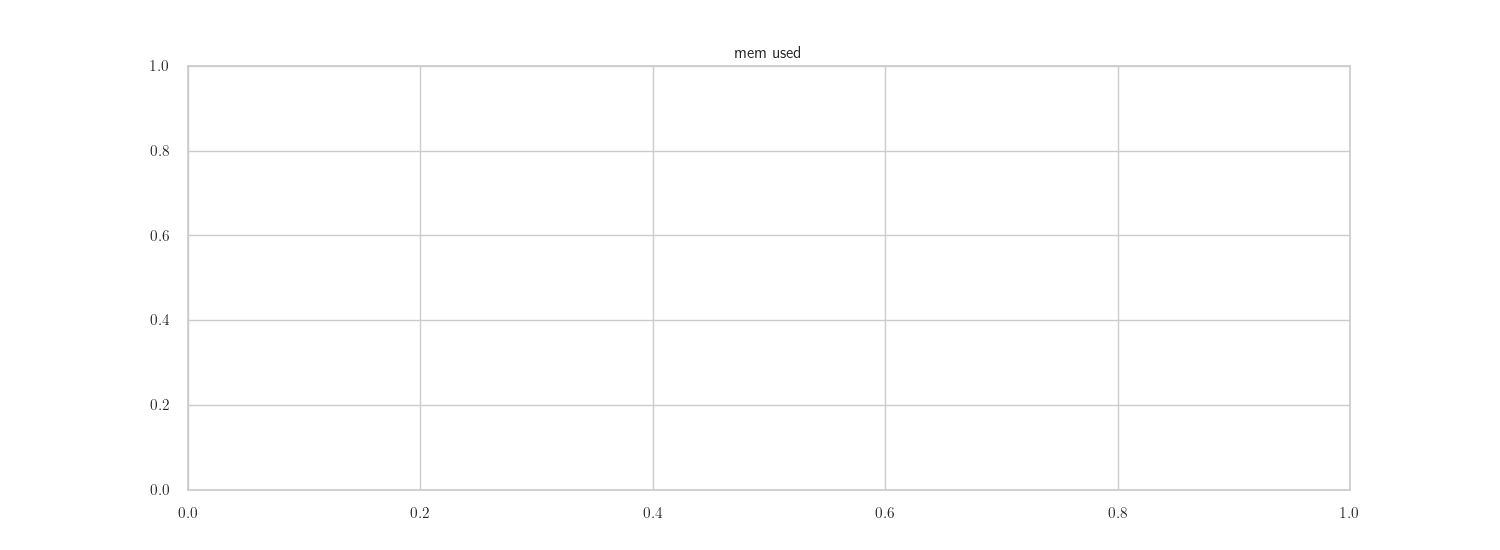

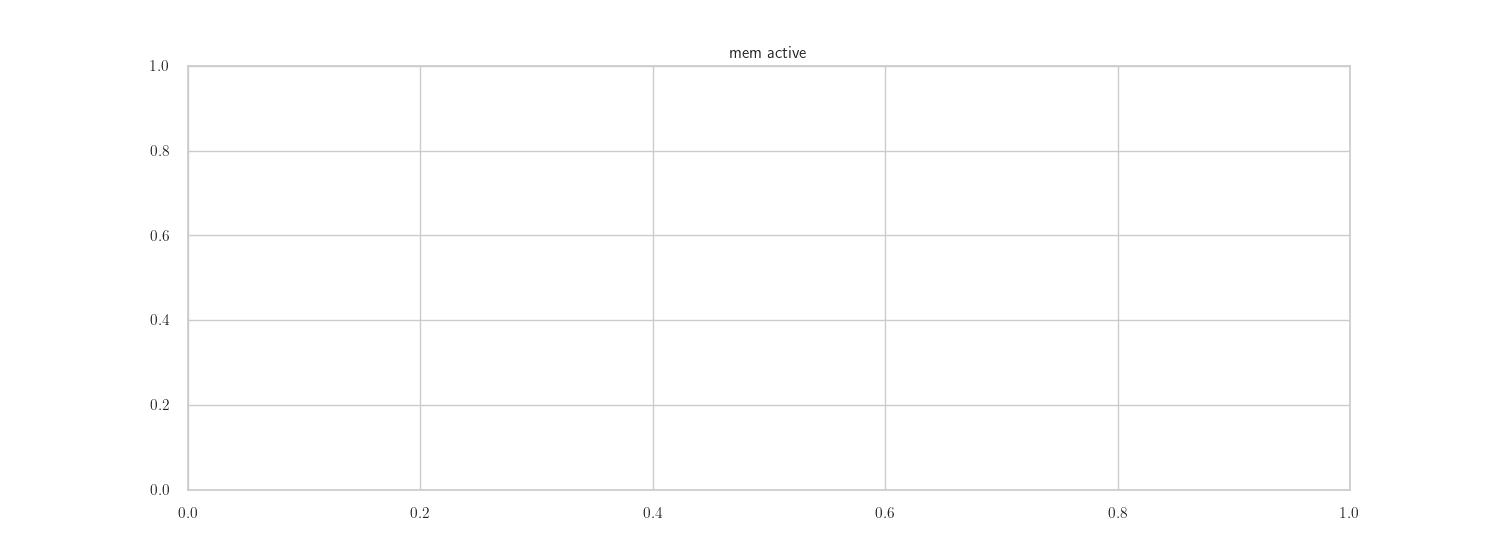

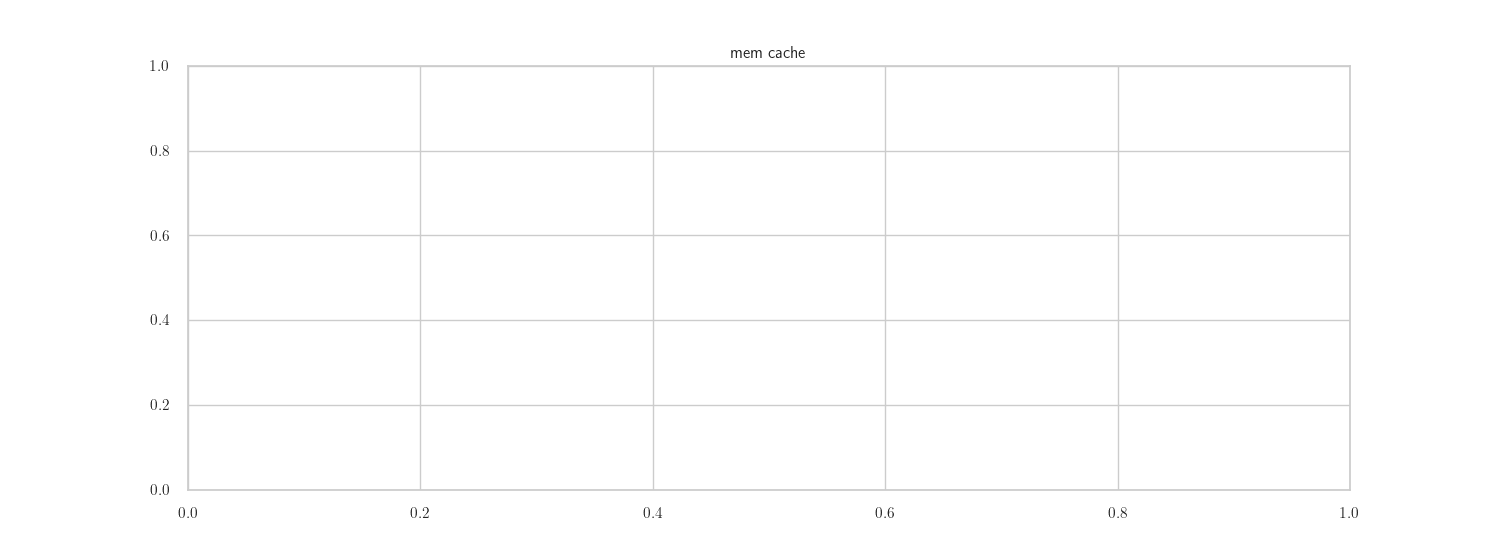

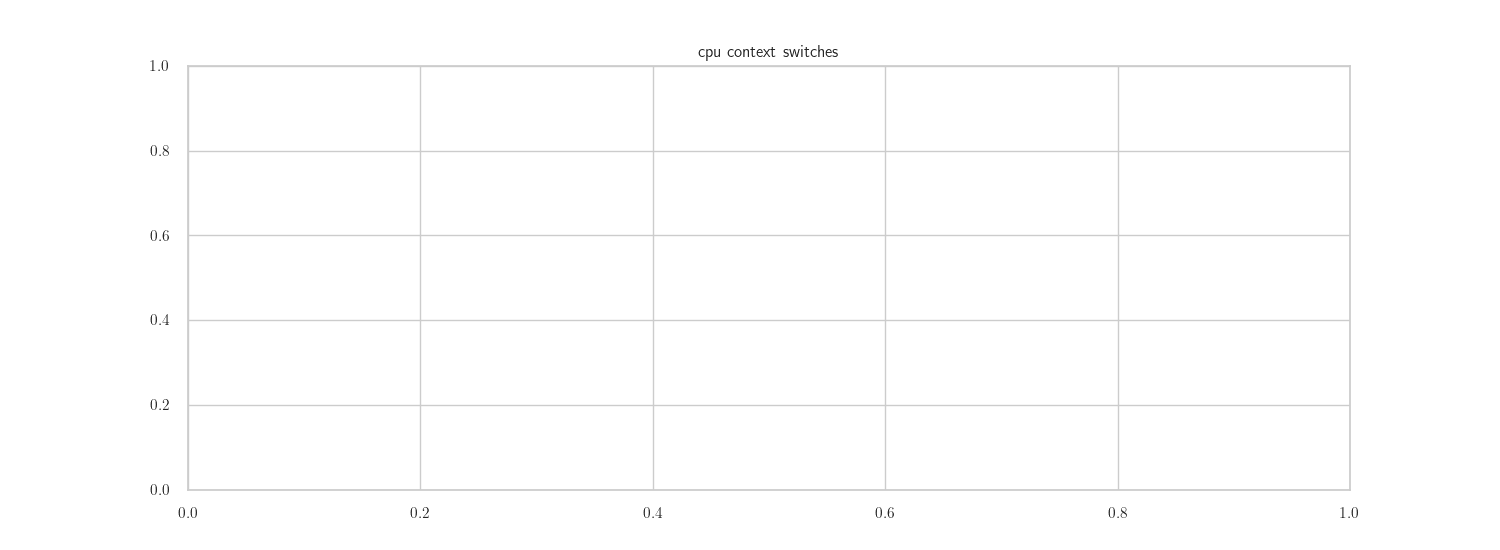

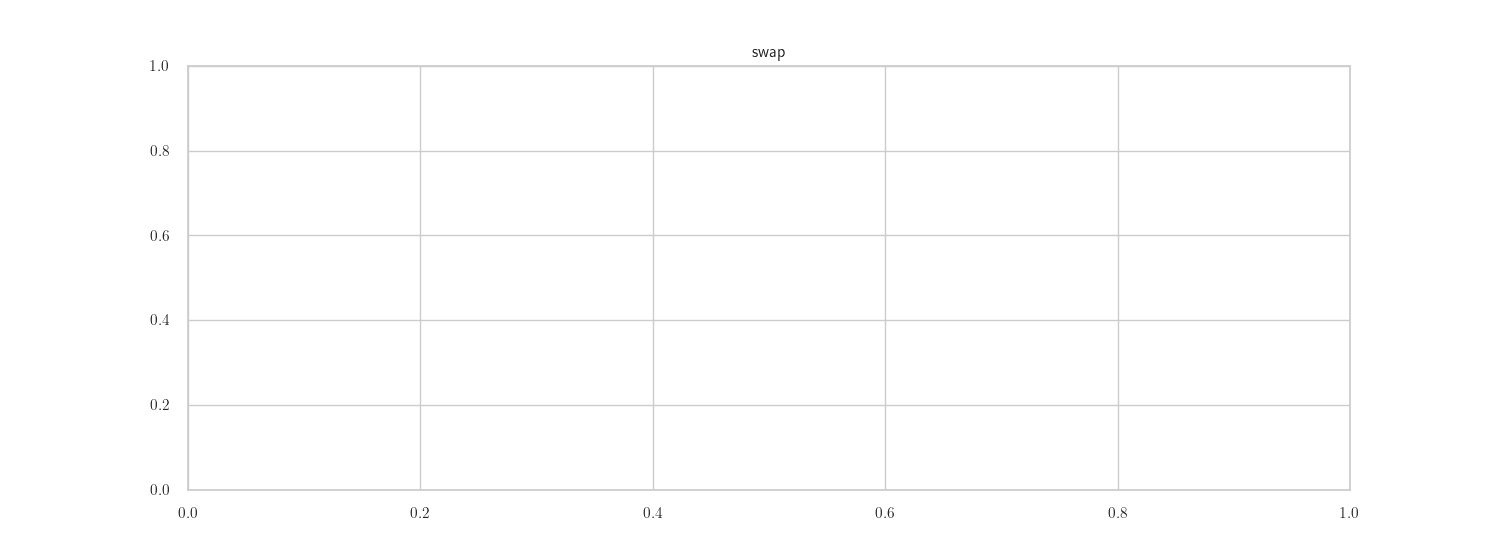

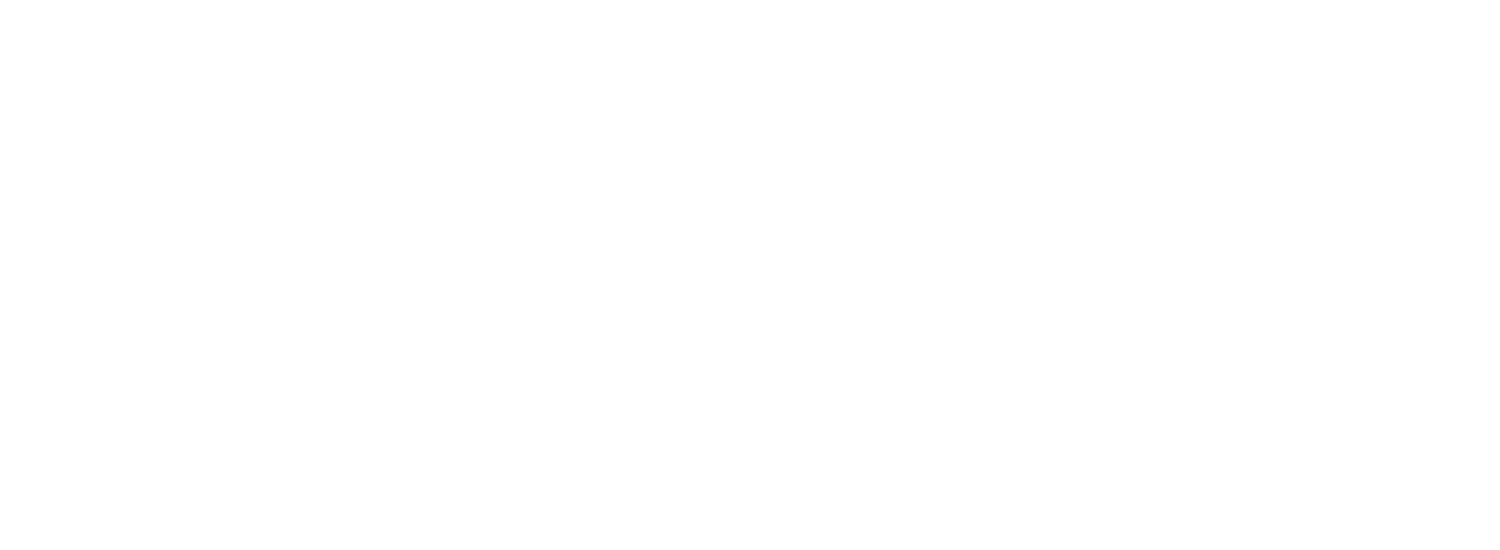

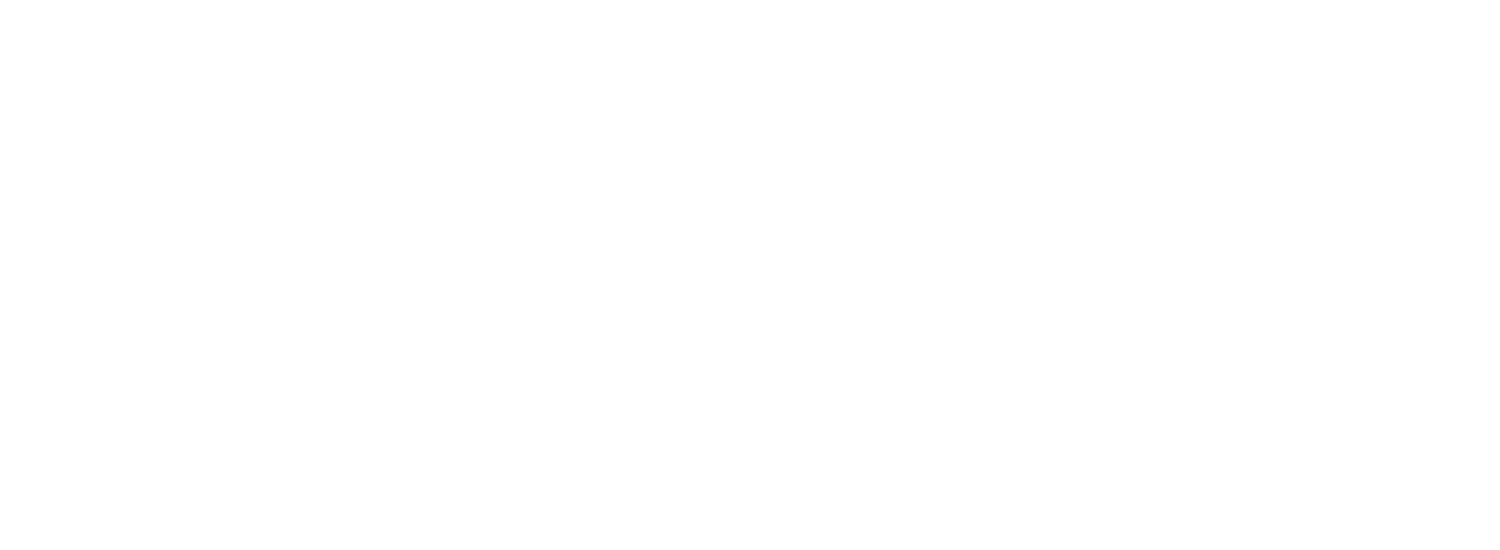

In [12]:
sysSelect=systemmetrics.groupby(['Database','Dimensions', 'BatchSize', 'ClientsNumber','Mode','Operation'], as_index=False).agg(
    {  "CpuTotal":'mean' , "CpuContextSwitches":'mean'  , "MemActive":'mean'  , "MemUsed":'mean'  ,
     "MemCached":'mean'  , "SwapUsed":'mean'  , "DiskReadBytes":'mean'  , "DiskReadCount":'mean'  , "DiskWriteBytes":'mean'  , "DiskWriteCount":'mean' } # APPRxMBpS  :  MS to S -> DataArrays*Dimensions =Dtapaints. -> float to Byte -> byte to MB  IMPORTANT!! DLTS stores Double, so practically doubles the ingestion
    )


means = sysSelect.groupby(['Database', 'ClientsNumber','Mode','Operation'], as_index=False).mean(numeric_only=True).reset_index()
systemmetricsDED=systemmetrics[systemmetrics['Mode'].str.contains("dedicated")]





plt.figure("Cpu-Cn").set_figwidth(15)
plt.title("Cpu clientsnumber")

sns.lineplot(data= systemmetricsDED , x="ClientsNumber", y="CpuTotal", hue="Database", style="Mode", markers=True, dashes=False)
plt.savefig('./cpu-cn.pdf', format='pdf')
plt.show()



plt.figure("Cpu-Bs").set_figwidth(15)
plt.title("Cpu batchsize")

sns.lineplot(data= systemmetricsDED , x="BatchSize", y="CpuTotal", hue="Database", style="Mode", markers=True, dashes=False)
plt.savefig('./Cpu-Bs.pdf', format='pdf')
plt.show()




###


plt.figure("Mem-Cn").set_figwidth(15)
plt.title("mem clientsnumber")

sns.lineplot(data= systemmetricsDED , x="ClientsNumber", y="MemUsed", hue="Database", style="Mode", markers=True, dashes=False)
plt.savefig('./mem-cn.pdf', format='pdf')
plt.show()



plt.figure("Mem-Bs").set_figwidth(15)
plt.title("mem batchsize")

sns.lineplot(data= systemmetricsDED , x="BatchSize", y="MemUsed", hue="Database", style="Mode", markers=True, dashes=False)
plt.savefig('./mem-Bs.pdf', format='pdf')
plt.show()




###

plt.figure("used mem ").set_figwidth(15)
plt.title("mem used")

sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="MemUsed", hue="Database", style="Mode")
plt.savefig('./mem-used.pdf', format='pdf')
plt.show()

plt.figure("active mem ").set_figwidth(15)
plt.title("mem active")

sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="MemActive", hue="Database", style="Mode")
plt.savefig('./mem-active.pdf', format='pdf')
plt.show()

plt.figure("cache mem ").set_figwidth(15)
plt.title("mem cache")

sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="MemCached", hue="Database", style="Mode")
plt.savefig('./mem-cache.pdf', format='pdf')
plt.show()


###

plt.figure("cpu context switches ").set_figwidth(15)
plt.title("cpu context switches")

sns.relplot(data= systemmetrics  ,kind="line", x="ClientsNumber", y="CpuContextSwitches", hue="Database", style="Mode")
plt.savefig('./cpu-context-switches.pdf', format='pdf')
plt.show()


plt.figure("swap ").set_figwidth(15)
plt.title("swap")

sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="SwapUsed", hue="Database", style="Mode")
plt.savefig('./swap.pdf', format='pdf')
plt.show()


####


plt.figure("Ingestion Disk WriteCOunt ").set_figwidth(15)
sns.catplot(data=systemmetricsDED[systemmetricsDED['Operation'].str.contains("Batch")], kind="bar", x='Database' , y="DiskWriteCount", hue="Database")

plt.savefig('./IngWriteCount.pdf', format='pdf')
plt.show()



plt.figure("Ingestion Disk Write Bytes ").set_figwidth(15)
sns.catplot(data=systemmetricsDED[systemmetricsDED['Operation'].str.contains("Batch")], kind="bar", x='Database' , y="DiskWriteBytes", hue="Database")

plt.savefig('./IngWriteBytes.pdf', format='pdf')
plt.show()

# ####


### multiDim transaction system usage

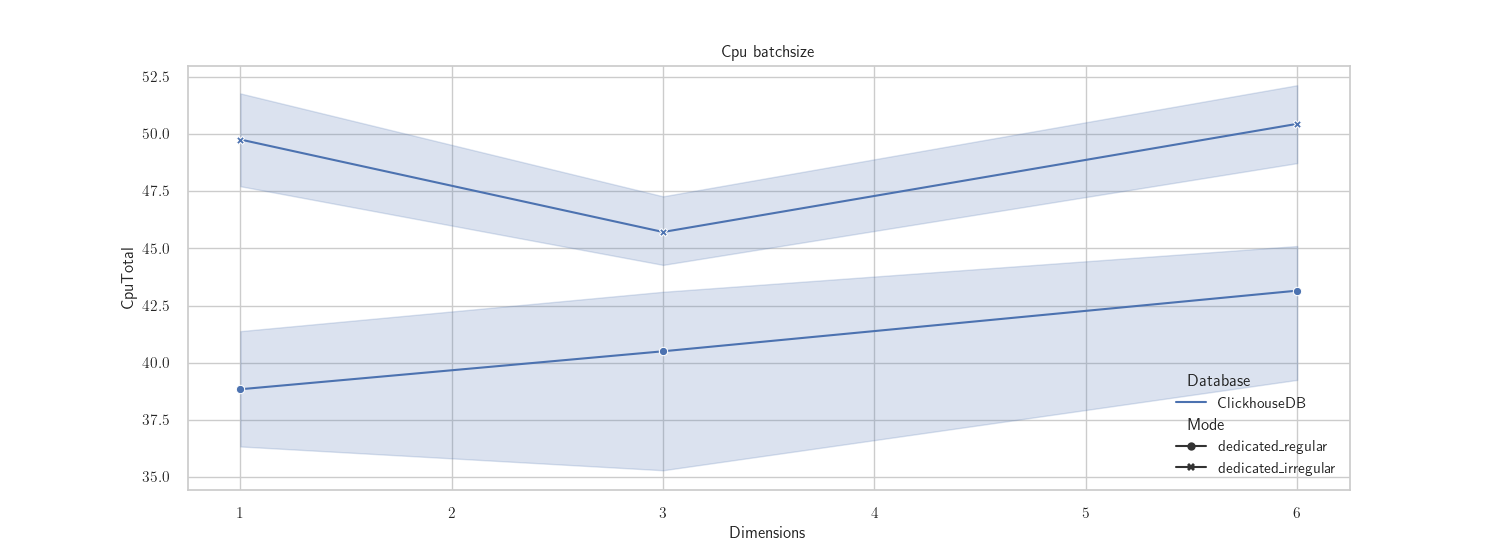

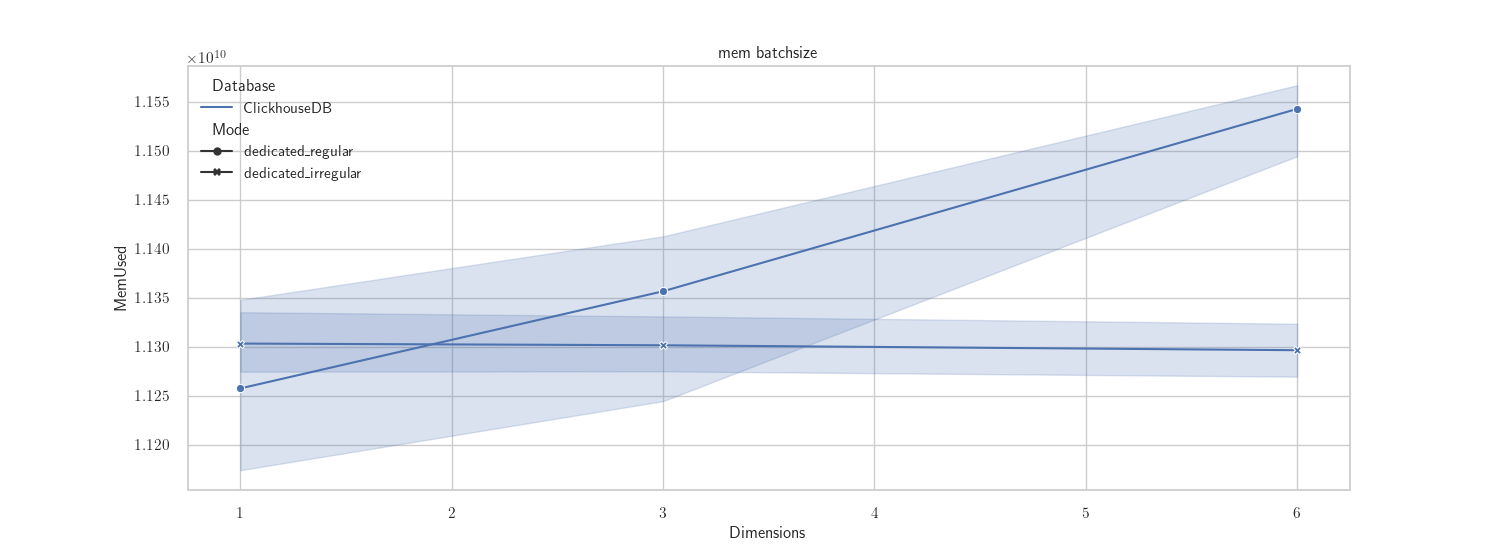

In [13]:



plt.figure("Cpu-Dim").set_figwidth(15)
plt.title("Cpu batchsize")

sns.lineplot(data= systemmetricsDED , x="Dimensions", y="CpuTotal", hue="Database", style="Mode", markers=True, dashes=False)
plt.savefig('./Cpu-Dim.pdf', format='pdf')
plt.show()


plt.figure("mem-Dim").set_figwidth(15)
plt.title("mem batchsize")

sns.lineplot(data= systemmetricsDED , x="Dimensions", y="MemUsed", hue="Database", style="Mode", markers=True, dashes=False)
plt.savefig('./mem-Dim.pdf', format='pdf')
plt.show()

## Scaling: How does the System behave with long-term ingestion?
### ingestion rate

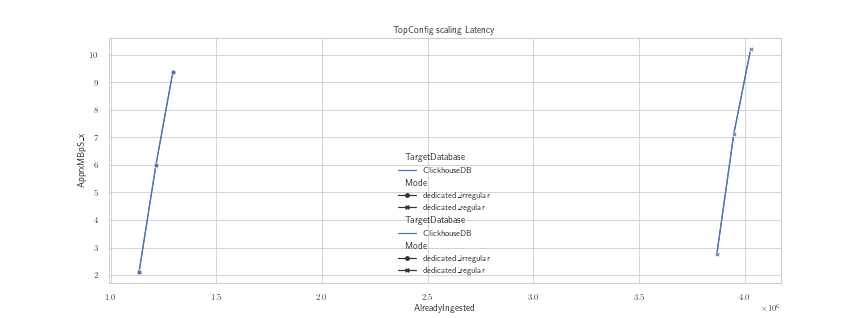

In [25]:
scaling_ingestion_rates=results_ratesW.assign(AlreadyIngested=results_ratesW.groupby(['TargetDatabase'])["ValueArrays"].cumsum()  )  
   
top_scaling_ingestion= scaling_ingestion_rates.merge(top_rates, how='right', on=['TargetDatabase','BatchSize','ClientsNumber','Mode']  )   
top_scaling_ingestionDED=top_scaling_ingestion.loc[top_scaling_ingestion.Mode.str.contains("dedicated")] 

plt.figure("TopConfig-scaling-Latency").set_figwidth(15)
plt.title("TopConfig scaling Latency")
sns.lineplot(data=top_scaling_ingestionDED , x="AlreadyIngested", y="ApprxMBpS_x", hue="TargetDatabase", style="Mode", markers=True, dashes=False)
plt.savefig('./scaleTopLatency.pdf', format='pdf')
plt.show()





# #show(ingestion_rates)
# fig, ax = plt.subplots(figsize=set_size('acm',))
# for key, grp in scaling_ingestion_rates.groupby(['TargetDatabase']):
#     ax.plot(grp['Values'][:-1], grp['ApprxMBpS'][:-1], label=labels[key], color=databases[key])

# ymin, ymax = ax.geMAYBEt_ylim()
# # ax.set_ylim(ymin, ymax * 1.35)
# ax.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0., prop={'size': 9}) 

# ax.set_xlabel('Size of Database (records)')
# ax.set_ylabel('Ingestion Rate (points/second)')
# # plt.tight_layout()
# plt.show()
# plt.savefig('./scaling.pdf', format='pdf')
    

### storage


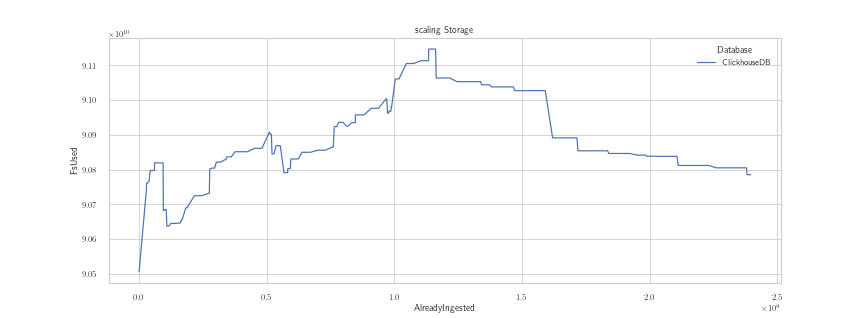

In [21]:
#diskusage since ingestionstart
scaling_storage=systemmetricsDED.assign(ApprxValues= lambda x: x.BatchSize*x.ClientsNumber*x.Dimensions)
scaling_storage=scaling_storage.assign(AlreadyIngested=scaling_storage.groupby(['Database'])['ApprxValues'].cumsum()  ).assign(FsUsed= lambda x: x.FsSize-x.FsFree)

plt.figure("scaling-Storage").set_figwidth(15)
plt.title("  scaling Storage")
sns.lineplot(data=scaling_storage , x="AlreadyIngested", y="FsUsed", hue="Database",  markers=True, dashes=False) #style="Mode",    .loc[scaling_storage['AlreadyIngested']>100]
plt.savefig('./scaleStorage.pdf', format='pdf')
plt.show()

### CPU  

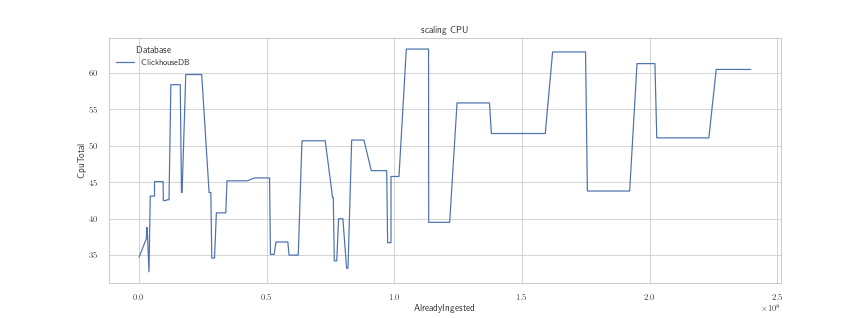

In [22]:
plt.figure("scaling-CPU").set_figwidth(15)
plt.title("  scaling CPU")
sns.lineplot(data=scaling_storage , x="AlreadyIngested", y="CpuTotal", hue="Database",  markers=True, dashes=False) #style="Mode",    .loc[scaling_storage['AlreadyIngested']>100]
plt.savefig('./scaleCPU.pdf', format='pdf')
plt.show()

 

### memory

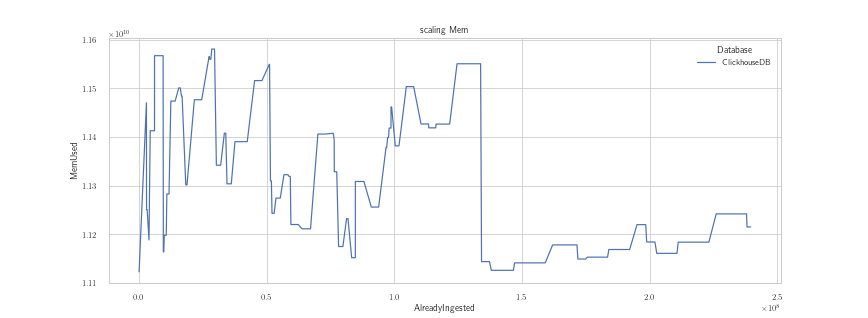

In [23]:
plt.figure("scaling-Mem").set_figwidth(15)
plt.title("  scaling Mem")
sns.lineplot(data=scaling_storage , x="AlreadyIngested", y="MemUsed", hue="Database",  markers=True, dashes=False) #style="Mode",    .loc[scaling_storage['AlreadyIngested']>100]
plt.savefig('./scaleMem.pdf', format='pdf')
plt.show()



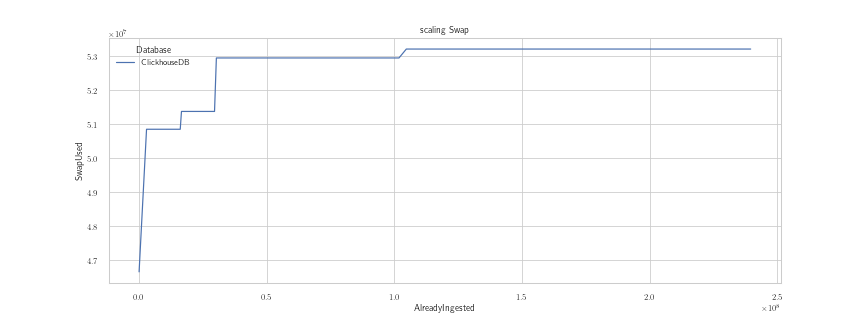

In [24]:
plt.figure("scaling-SWap").set_figwidth(15)
plt.title("  scaling Swap")
sns.lineplot(data=scaling_storage , x="AlreadyIngested", y="SwapUsed", hue="Database",  markers=True, dashes=False) #style="Mode",    .loc[scaling_storage['AlreadyIngested']>100]
plt.savefig('./scaleSwap.pdf', format='pdf')
plt.show()


# Queries 


## regular vs irregular query stats  

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

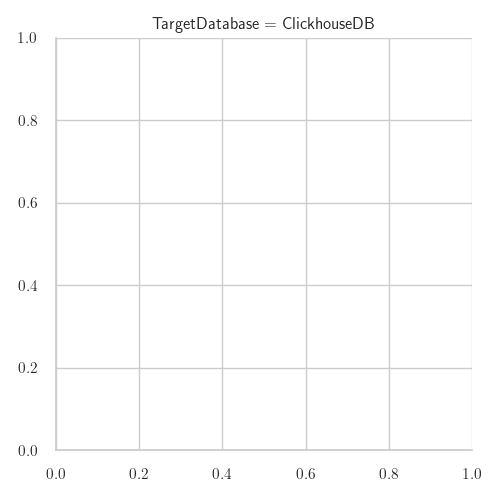

In [31]:




# #Batchsize
# fig2, ax2 = plt.subplots()
plt.figure("Q-BS").set_figwidth(15)
sns.catplot(data= result_ratesR ,kind='violin', x="BatchSize", y="Latency", hue="Mode", col="TargetDatabase",
                split=True, inner="quart", linewidth=1, 
                # palette={"dedicated_regular": "b", "dedicated_irregular": ".85"}
                )
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Data Querying based on Size of Batches")
plt.show()
plt.savefig('./QregularityBS-violin.pdf', format='pdf')
# plt.close()


# #Batchsize
# fig2, ax2 = plt.subplots()
plt.figure("Q-CN").set_figwidth(15)
sns.catplot(data= result_ratesR ,kind='violin', x="ClientsNumber", y="Latency", hue="Mode", col="TargetDatabase",
                split=True, inner="quart", linewidth=1, 
                palette={"dedicated_regular": "b", "dedicated_irregular": ".85"})
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Data Querying based on Size of Batches")
plt.show()
plt.savefig('./QregularityBS-violin.pdf', format='pdf')
# plt.close()



# queries_results = pd.read_csv('~/metrics-22-06/MReadAll.csv', sep=";",  on_bad_lines = 'warn')
# queries_results['Latency'] = pd.to_numeric(queries_results['Latency'], errors = 'coerce')
# queries_results  = queries_results.loc[queries_results['Latency'] > 0 ]
# def _query_stat(group):
#     lat = group['Latency']
#     return pd.Series({'min': lat.min(), 'avg': lat.mean(), '95': lat.quantile(0.95), 'max': lat.max(),  'stddev': lat.std()})

# def show_query_stat(qtype):
#     dbs = queries_results[queries_results['Operation'] == qtype].groupby(['Mode',"TargetDatabase"]).apply(_query_stat)
#     show(dbs)
    


In [ ]:
show_query_stat('RangeQueryRawData')
show_query_stat('RangeQueryRawAllDimsData')

In [ ]:
show_query_stat('OutOfRangeQuery')

In [ ]:
show_query_stat('STDDevQuery')

In [ ]:
show_query_stat('RangeQueryAggData')

In [ ]:
show_query_stat('DifferenceAggQuery')

## Multidim Query stats

## Query System Metrics


### regurlar vs irregular transaction system usage 


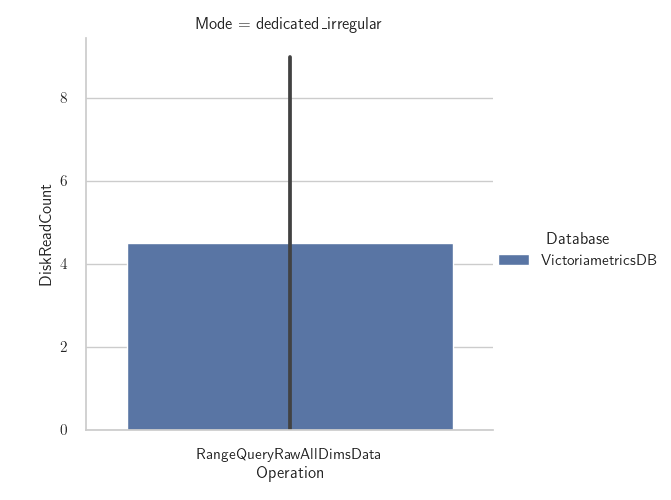

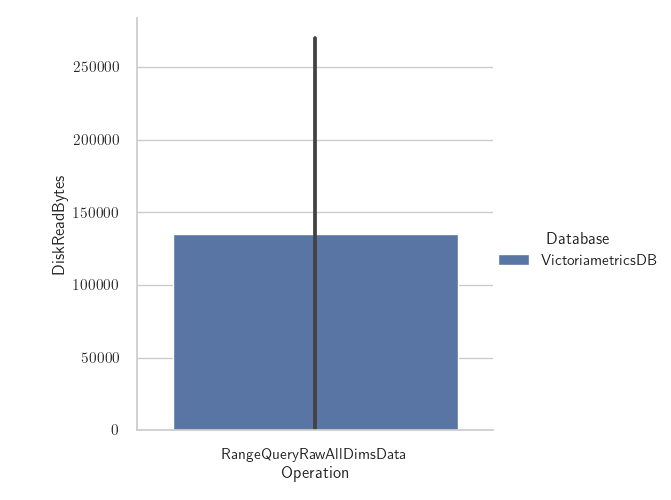

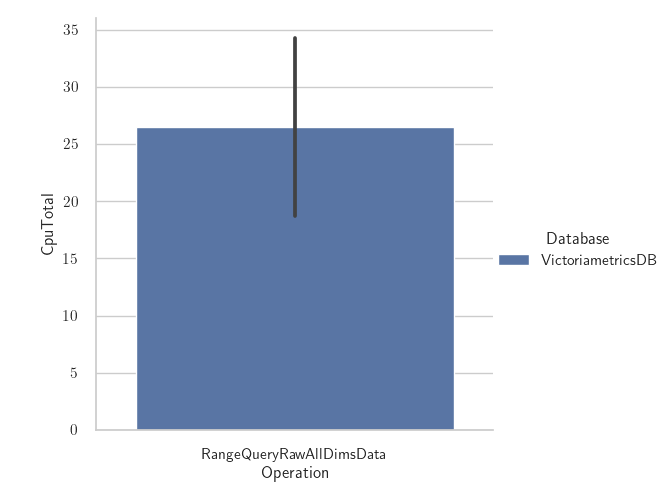

TypeError: Neither the `x` nor `y` variable appears to be numeric.

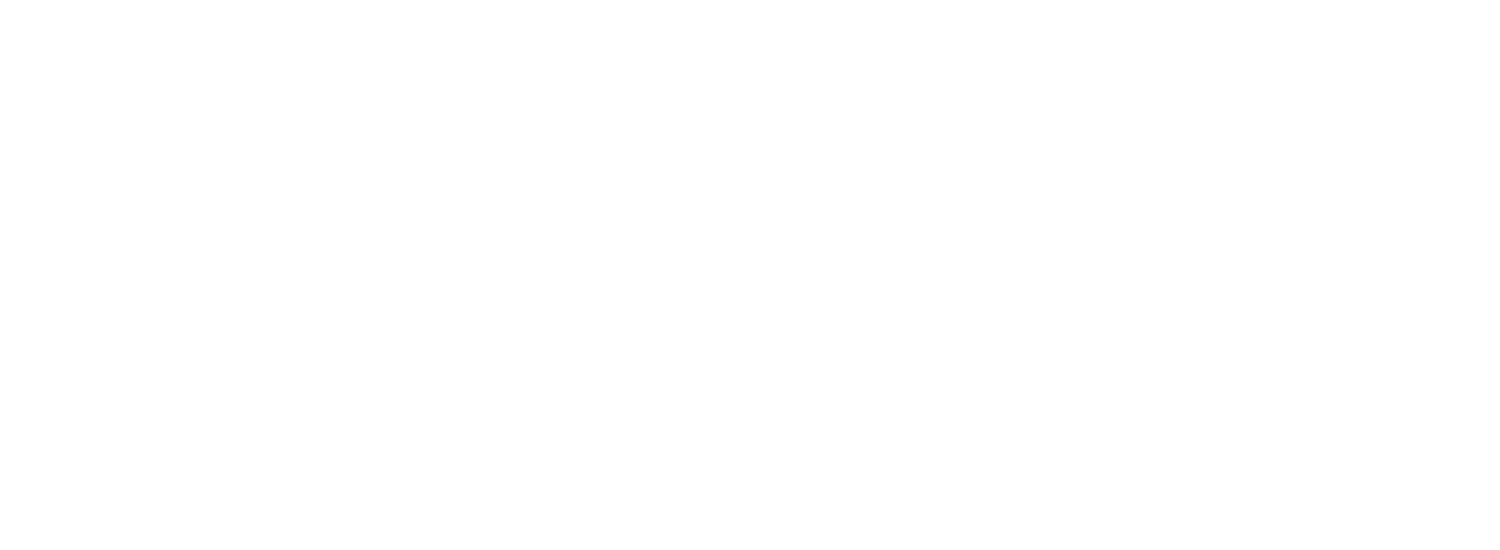

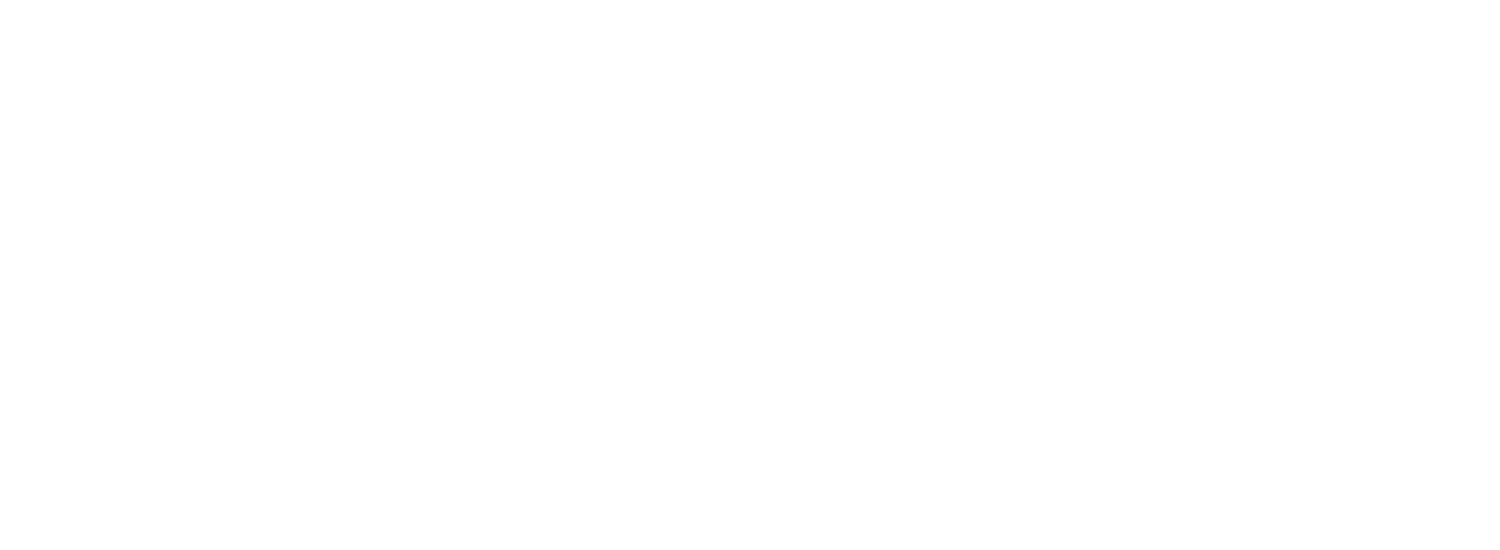

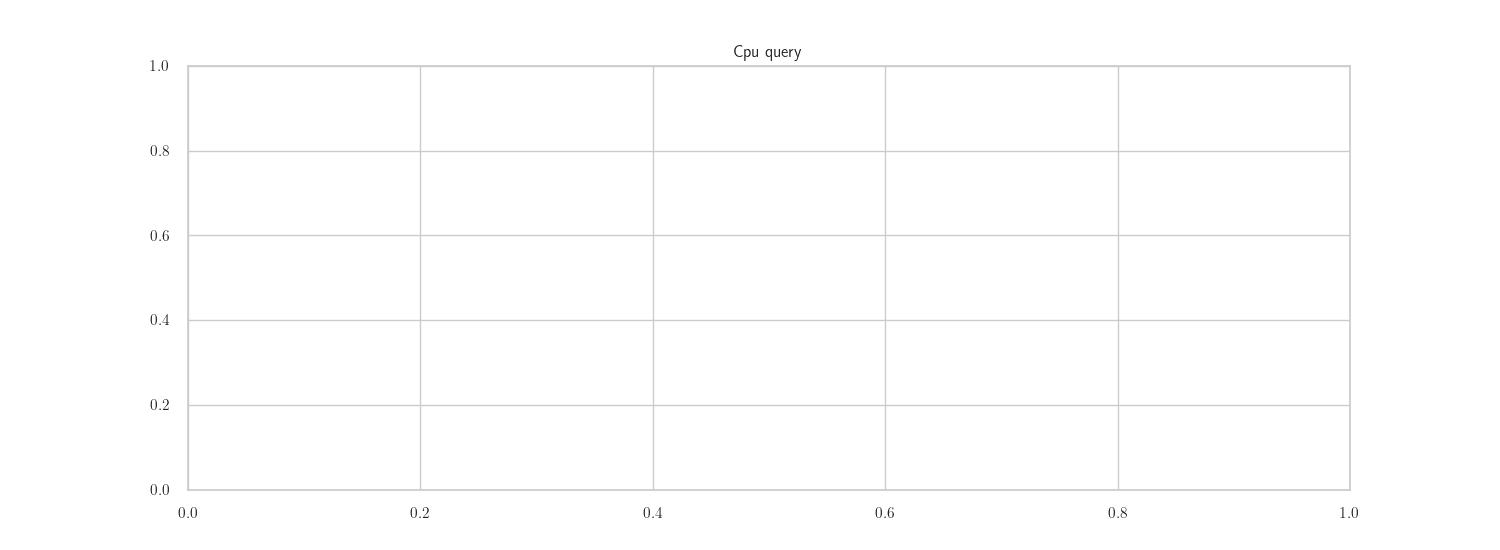

In [ ]:
systemmetricsDED_R= systemmetricsDED[systemmetricsDED['Operation'].str.contains("Query")]
 



plt.figure("Query Disk Read COunt ").set_figwidth(15)
sns.catplot(data=systemmetricsDED_R, kind="bar", x='Operation' , y="DiskReadCount", hue="Database", col='Mode')

plt.savefig('./QreadCount.pdf', format='pdf')
plt.show()



plt.figure("Query Disk Read Bytes ").set_figwidth(15)
sns.catplot(data=systemmetricsDED_R, kind="bar", x='Operation' , y="DiskReadBytes", hue="Database")

plt.savefig('./QreadBytes.pdf', format='pdf')
plt.show()



plt.figure("Cpu-Q").set_figwidth(15)
plt.title("Cpu query")
sns.catplot(data=systemmetricsDED_R, kind="bar", x='Operation' , y="CpuTotal", hue="Database")
plt.savefig('./cpu-query.pdf', format='pdf')
plt.show()


plt.figure("Cpu-Q").set_figwidth(15)
plt.title("Cpu query")
sns.catplot(data=systemmetricsDED_R, kind="bar", x='Operation' , y="MemTotal", hue="Database")
plt.savefig('./cpu-query.pdf', format='pdf')
plt.show()



plt.figure("Cpu-Q").set_figwidth(15)
plt.title("Cpu query")
sns.lineplot(data= systemmetricsDED_R , x="Operation", y="MemTotal", hue="Database", style="Mode", markers=True, dashes=False)
plt.savefig('./cpu-query.pdf', format='pdf')
plt.show()


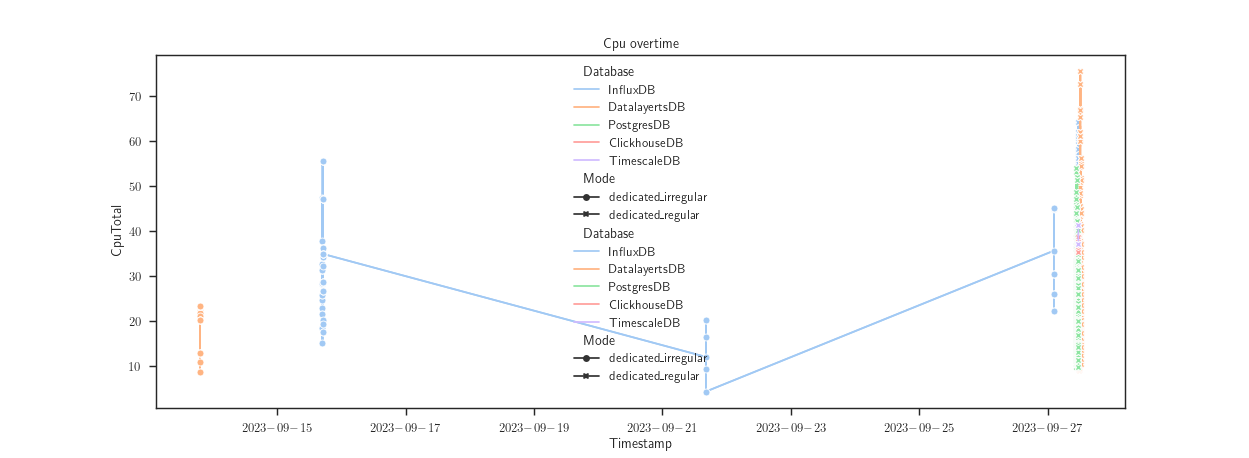

In [ ]:





# plt.figure("Cpu-Cn").set_figwidth(15)
# plt.title("Cpu clientsnumber")

# sns.lineplot(data= systemmetricsDED , x="ClientsNumber", y="CpuTotal", hue="Database", style="Mode", markers=True, dashes=False)
# plt.savefig('./cpu-cn.pdf', format='pdf')
# plt.show()



# plt.figure("Cpu-Bs").set_figwidth(15)
# plt.title("Cpu batchsize")

# sns.lineplot(data= systemmetricsDED , x="BatchSize", y="CpuTotal", hue="Database", style="Mode", markers=True, dashes=False)
# plt.savefig('./Cpu-Bs.pdf', format='pdf')
# plt.show()

# plt.figure("Cpu-Dim").set_figwidth(15)
# plt.title("Cpu batchsize")

# sns.lineplot(data= systemmetricsDED , x="Dimensions", y="CpuTotal", hue="Database", style="Mode", markers=True, dashes=False)
# plt.savefig('./Cpu-Dim.pdf', format='pdf')
# plt.show()



# ###


# plt.figure("Mem-Cn").set_figwidth(15)
# plt.title("mem clientsnumber")

# sns.lineplot(data= systemmetricsDED , x="ClientsNumber", y="MemUsed", hue="Database", style="Mode", markers=True, dashes=False)
# plt.savefig('./mem-cn.pdf', format='pdf')
# plt.show()



# plt.figure("Mem-Bs").set_figwidth(15)
# plt.title("mem batchsize")

# sns.lineplot(data= systemmetricsDED , x="BatchSize", y="MemUsed", hue="Database", style="Mode", markers=True, dashes=False)
# plt.savefig('./mem-Bs.pdf', format='pdf')
# plt.show()

# plt.figure("mem-Dim").set_figwidth(15)
# plt.title("mem batchsize")

# sns.lineplot(data= systemmetricsDED , x="Dimensions", y="MemUsed", hue="Database", style="Mode", markers=True, dashes=False)
# plt.savefig('./mem-Dim.pdf', format='pdf')
# plt.show()



####

# plt.figure("used mem ").set_figwidth(15)
# plt.title("mem used")

# sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="MemUsed", hue="Database", style="Mode")
# plt.savefig('./mem-used.pdf', format='pdf')
# plt.show()

# plt.figure("active mem ").set_figwidth(15)
# plt.title("mem active")

# sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="MemActive", hue="Database", style="Mode")
# plt.savefig('./mem-active.pdf', format='pdf')
# plt.show()

# plt.figure("cache mem ").set_figwidth(15)
# plt.title("mem cache")

# sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="MemCached", hue="Database", style="Mode")
# plt.savefig('./mem-cache.pdf', format='pdf')
# plt.show()


####

# plt.figure("cpu context switches ").set_figwidth(15)
# plt.title("cpu context switches")

# sns.relplot(data= systemmetrics  ,kind="line", x="ClientsNumber", y="CpuContextSwitches", hue="Database", style="Mode")
# plt.savefig('./cpu-context-switches.pdf', format='pdf')
# plt.show()


# plt.figure("swap ").set_figwidth(15)
# plt.title("swap")

# sns.relplot(data= systemmetricsDED  ,kind="line", x="ClientsNumber", y="SwapUsed", hue="Database", style="Mode")
# plt.savefig('./swap.pdf', format='pdf')
# plt.show()


# ####


# plt.figure("Ingestion Disk WriteCOunt ").set_figwidth(15)
# sns.catplot(data=systemmetricsDED[systemmetricsDED['Operation'].str.contains("Batch")], kind="bar", x='Database' , y="DiskWriteCount", hue="Database")

# plt.savefig('./IngWriteCount.pdf', format='pdf')
# plt.show()



# plt.figure("Ingestion Disk Write Bytes ").set_figwidth(15)
# sns.catplot(data=systemmetricsDED[systemmetricsDED['Operation'].str.contains("Batch")], kind="bar", x='Database' , y="DiskWriteBytes", hue="Database")

# plt.savefig('./IngWriteBytes.pdf', format='pdf')
# plt.show()

# ####


In [ ]:
means = n_sysdf.groupby(['Database', 'ClientsNumber']).mean().reset_index() 
means['DiskWriteBytes'] = means['DiskWriteBytes'] / 1e6
fig, ax = plt.subplots(1, 1, figsize=set_size('acm'), )

sns.lineplot(x='ClientsNumber', y='DiskWriteBytes', hue='Database', palette=databases, data=means, marker='o', legend=False,
             ax=ax, markers='o', 
            )
ax.set_yscale('log')
ax.set_xticks([1, 2, 4, 8, 12, 18, 24, 36, 48])
# ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xlabel('Clients Number')
ax.set_ylabel('Disk Write (MB/s)')
ax.legend(labels=['ClickHouse', 'InfluxDB', 'PostgreSQL',  'TimescaleDB'], **legend_kwargs, )
plt.show()
plt.savefig('/home/jalal/papers/phd/tsdb/vldb/figures/clients-diskwrite.pdf', format='pdf')

NameError: name 'n_sysdf' is not defined

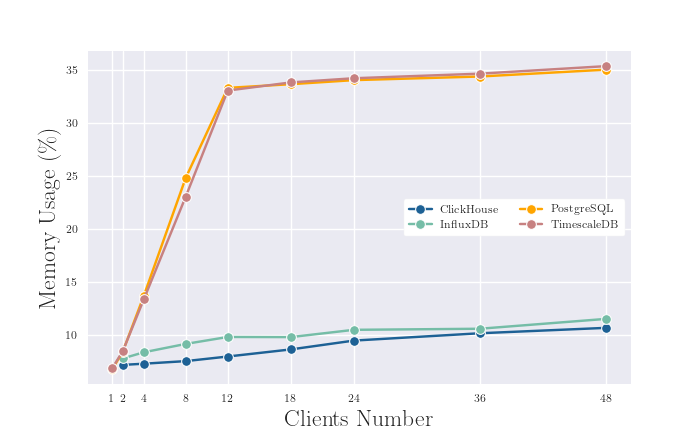

In [ ]:
means = n_sysdf.groupby(['Database', 'ClientsNumber']).mean().reset_index()
means['MemUsed'] = used_mem(means['MemUsed'])
fig, ax = plt.subplots(1, 1, figsize=set_size('acm'), )

sns.lineplot(x='ClientsNumber', y='MemUsed', hue='Database', palette=databases, data=means, marker='o',
             ax=ax, markers='o'
            )
ax.set_xticks([1,2,4,8,12,18,24,36,48])
# ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xlabel('Clients Number')
ax.set_ylabel('Memory Usage (\%)')
ax.legend(labels=['ClickHouse', 'InfluxDB', 'PostgreSQL',  'TimescaleDB'], **legend_kwargs, loc='center right')
plt.show()
plt.savefig('/home/jalal/papers/phd/tsdb/vldb/figures/clients-mem.pdf', format='pdf')

In [ ]:
%%

UsageError: Cell magic `%%` not found.


### multiDim transaction system usage

In [ ]:
%%

# Mixed, Online Workloads

In [ ]:
  
# mixedWL_rates=query_rates.groupby(['TargetDatabase','Mode','Operation'],as_index= False).agg({'Latency':'mean','ValuePoints':'mean','ApprxMBpS':'mean'}).merge(
#     ingestion_rates.groupby(['TargetDatabase','Mode','Operation'],as_index= False).agg({'Latency':'mean','ValuePoints':'mean','ApprxMBpS':'mean'}) , how='outer'  , on=['TargetDatabase','Mode','Operation','Latency','ValuePoints','ApprxMBpS'] 
#     )
# mixedWL_rates=mixedWL_rates[mixedWL_rates['Mode'].str.contains('mixed')]
# mixedWL_rates['Percentage'] = mixedWL_rates['Mode'].str.extract('(\d+)', expand=False)


## Ingestion

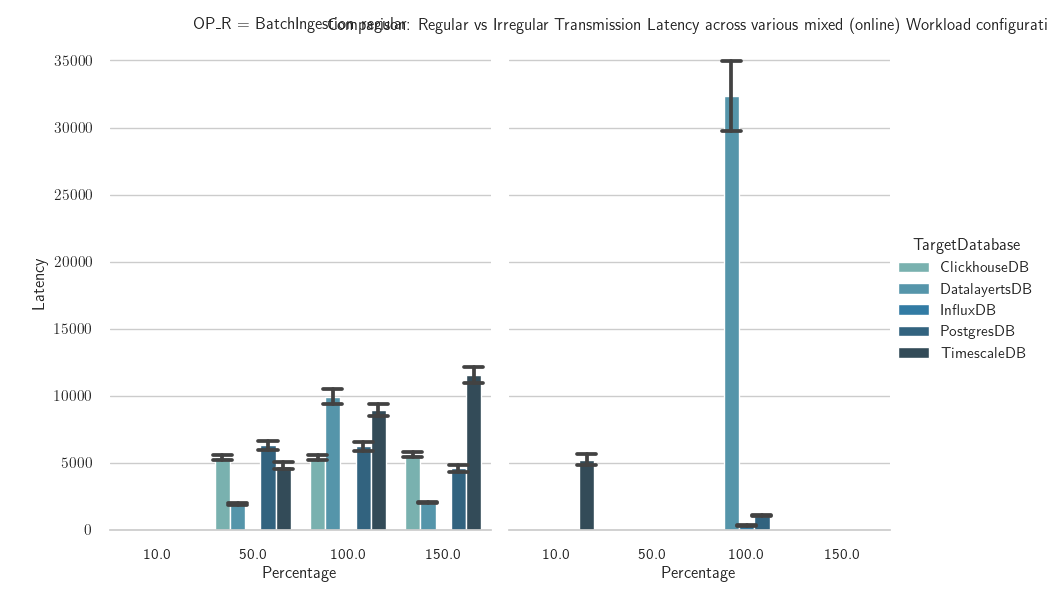

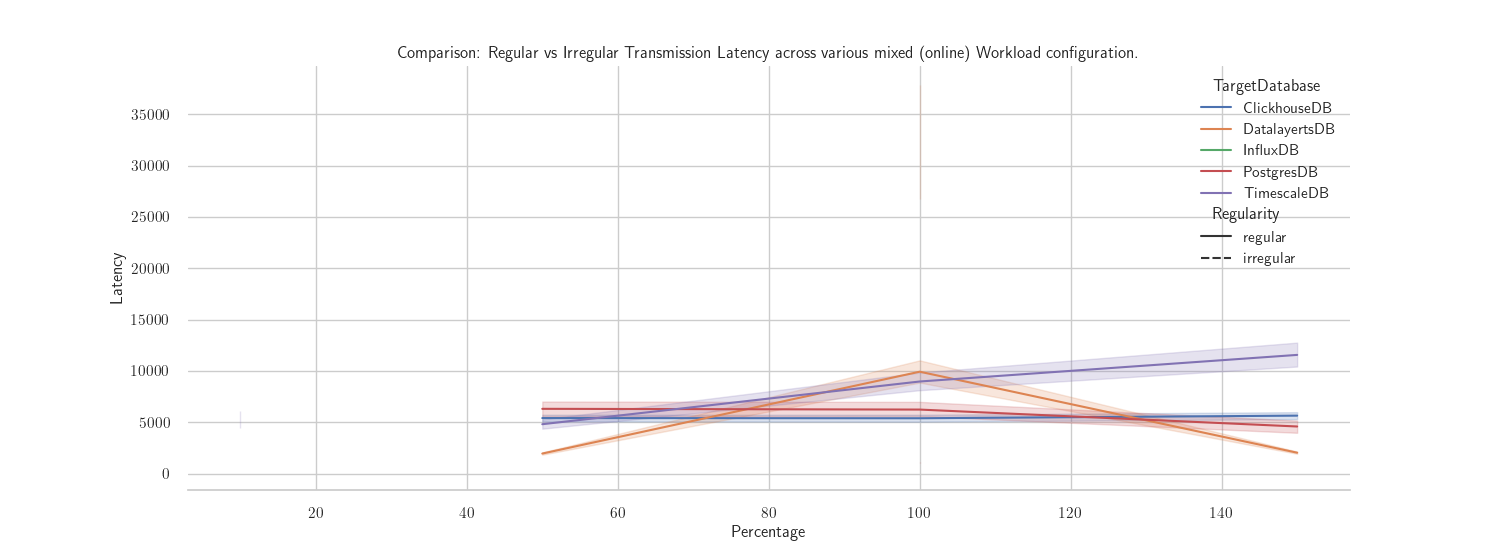

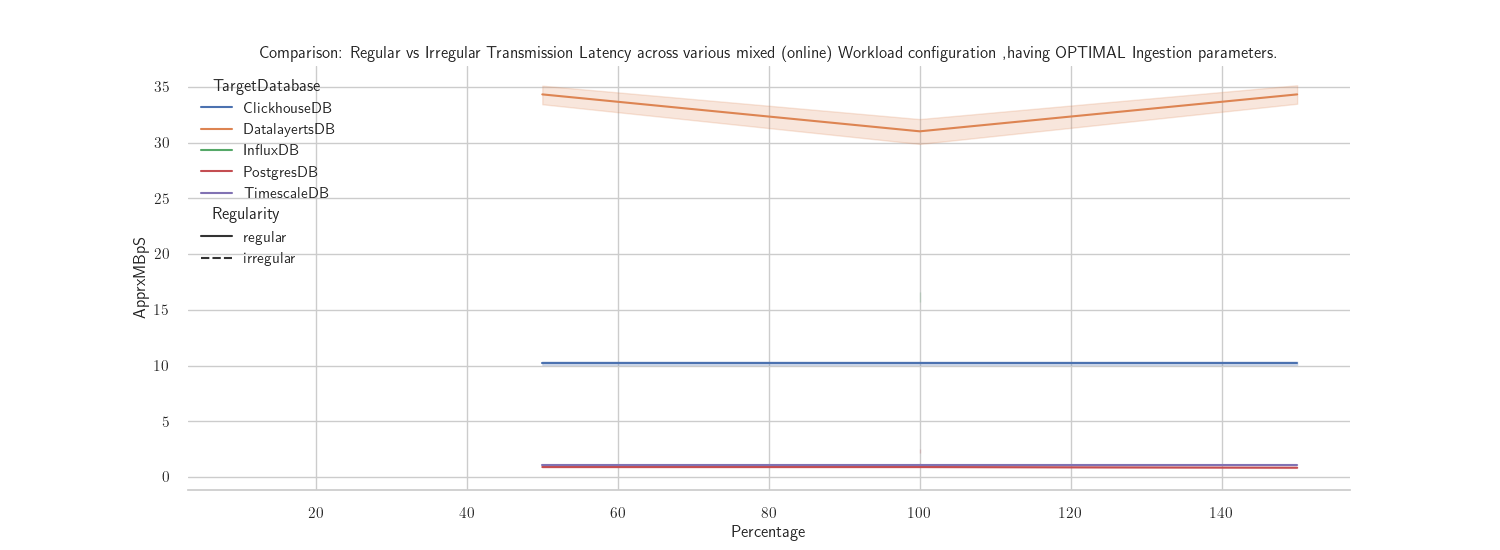

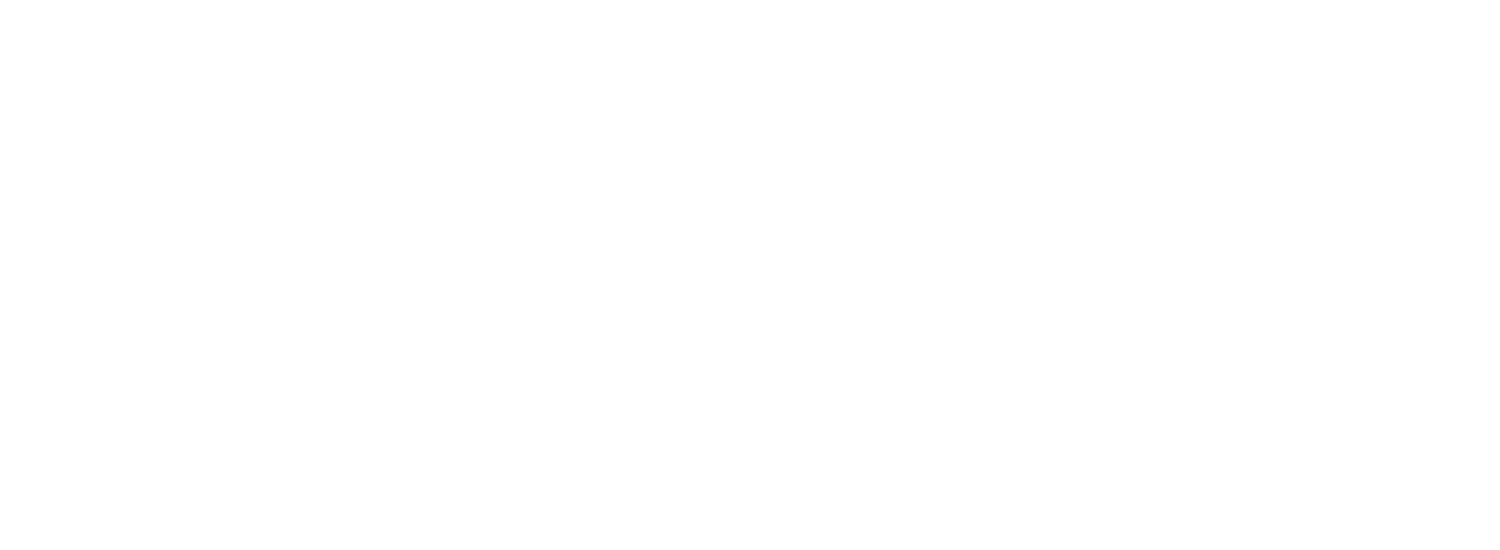

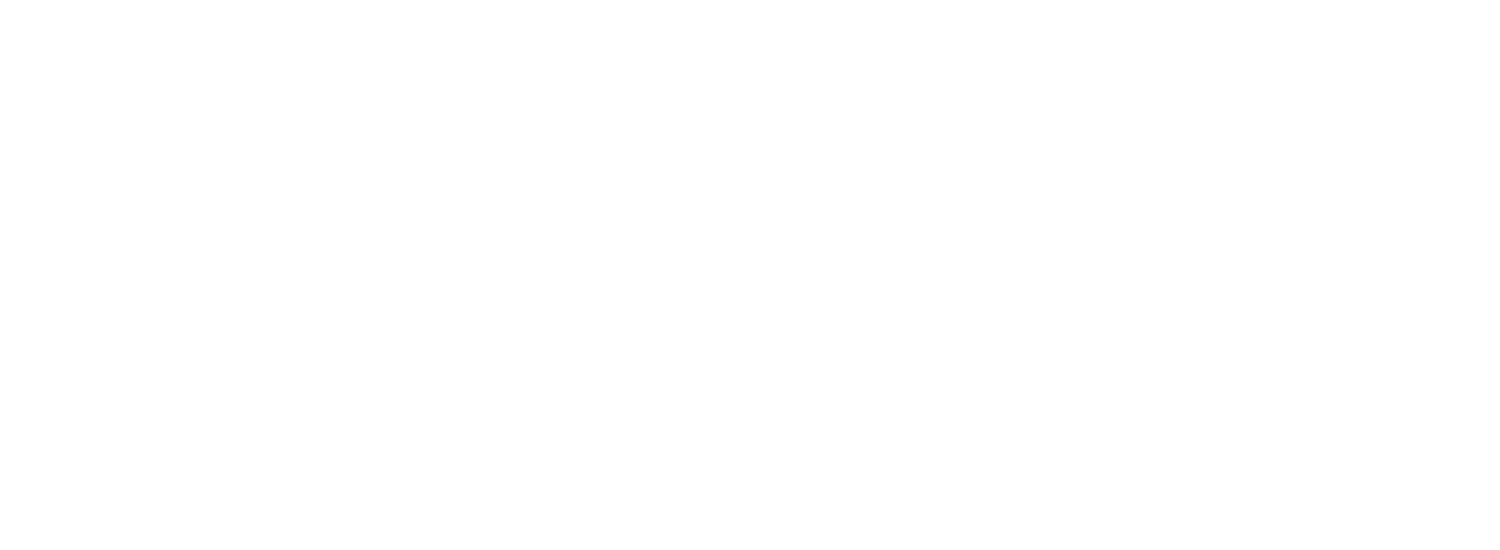

In [ ]:
mixedQueries_results = results[results['Mode'].str.contains('mixed')].assign(Mode_OP = lambda x: x.Mode + x.Operation).assign(OP_R = lambda x: x.Operation + " " + x.Regularity)
mixedQueries_results['Percentage'] = mixedQueries_results['Mode'].str.extract('(\d+)', expand=False)
mixedQueries_results['Percentage'] = pd.to_numeric(mixedQueries_results['Percentage'] , errors = 'coerce' )

# [['TargetDatabase','Mode','Operation','Latency','ApprxMBpS','ValuePoints']
#        ].loc[results['Mode']==['mixedQueries_regular','mixedQueries_irregular'] ]


    
# General overview and mean values across BS CN DIM ...

import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")
plt.figure("MQ-R").set_figwidth(15)



# fig.suptitle('Horizontally stacked subplots')

# fig, (ax1, ax2 ) = plt.subplots(1, 2)


# # Draw a nested violinplot and split the violins for easier comparison
# ax1 = sns.violinplot(data=mixedQueries_results[mixedQueries_results['Percentage'].str.contains('25')], x="TargetDatabase", y="Latency", hue="Regularity",
#                split=True, inner="quart", linewidth=1,
#                palette={"regular": "b", "irregular": ".85"})

# ax2 = sns.violinplot(data=mixedQueries_results[mixedQueries_results['Percentage'].str.contains('50')], x="TargetDatabase", y="Latency", hue="Regularity",
#                split=True, inner="quart", linewidth=1,
#                palette={"regular": "r", "irregular": ".85"})


# sns.violinplot(data=mixedQueries_results[mixedQueries_results['Percentage'].str.contains('75')], x="TargetDatabase", y="Latency", hue="Regularity",
#                split=True, inner="quart", linewidth=1,
#                palette={"regular": "g", "irregular": ".85"})


import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example exercise dataset
 

# Draw a pointplot to show pulse as a function of three categorical factors
# sns.catplot(
#     data=mixedQueries_results[mixedQueries_results['Mode'].str.contains('Ingestion')],x="Percentage", y="Latency", hue="TargetDatabase", col="Regularity", 
#     capsize=.2, palette="YlGnBu_d", errorbar="se",
#     kind="point", height=6, aspect=.75,
# )
plt.figure("mx-bar").set_figwidth(15)
sns.catplot( # bar or point? 
    data=mixedQueries_results,x="Percentage", y="Latency", hue="TargetDatabase", col="OP_R",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="bar", height=6, aspect=.75,
)

sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Transmission Latency across various mixed (online) Workload configuration.")
plt.show()
plt.savefig('./mixedBar.pdf', format='pdf')



 
 
plt.figure("mx-line").set_figwidth(15)
sns.lineplot( # bar or point? 
    data=mixedQueries_results,x="Percentage", y="Latency", hue="TargetDatabase", style="Regularity"
    
)
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Transmission Latency across various mixed (online) Workload configuration.")
plt.show()
plt.savefig('./mixedLine.pdf', format='pdf')



# ## grouped boxplot

# import seaborn as sns
# sns.set_theme(style="ticks", palette="pastel")


# plt.figure("MQ-R").set_figwidth(15)
# # Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="Percentage", y="Latency",
#             hue="Mode_OP", palette=["m", "g","b","r","y","w"],
#             data=mixedQueries_results_reg)
# sns.despine(offset=10, trim=True)
# plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Regular Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-groupedBP-R.pdf', format='pdf')
# plt.show()




# plt.figure("MQ-IR").set_figwidth(15)

# sns.boxplot(x="TargetDatabase", y="Latency",
#             hue="Mode_OP", palette=[ "g","b","r"],
#             data=mixedQueries_results_irreg)
# sns.despine(offset=10, trim=True)
# plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Irregular Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-groupedBP-IR.pdf', format='pdf')
# plt.show()



# # select TOP RATE CONFIG from base ingestion and analyse mixed WL

mixedQueries_TOP_results = mixedQueries_results.merge(top_rates, how='inner', on=['TargetDatabase','BatchSize','ClientsNumber','Dimensions'] )


 
plt.figure("TOP-mx-line").set_figwidth(15)
sns.lineplot( # bar or point? 
    data=mixedQueries_TOP_results,x="Percentage", y="ApprxMBpS", hue="TargetDatabase", style="Regularity"
    
)
sns.despine(left=True)
plt.title("Comparison: Regular vs Irregular Transmission Latency across various mixed (online) Workload configuration ,having OPTIMAL Ingestion parameters.")
plt.show()
plt.savefig('./mixedLine-TOP.pdf', format='pdf')





# plt.figure("MQ-TOP_I").set_figwidth(15)

# sns.boxplot(x="TargetDatabase", y="Latency",
#             hue="Mode_OP", palette=["m", "g","b","r","y","w"],
#             data= mixedQueries_TOP_results[mixedQueries_TOP_results['Operation'].str.contains('Ingestion')] )
# sns.despine(offset=10, trim=True)
# plt.title("TOP (Optimal Ingestion Config.) Latency For Ingestion Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-TOP-I-groupedBP.pdf', format='pdf')
# plt.show()





# plt.figure("MQ-TOP_Q").set_figwidth(15)

# sns.boxplot(x="TargetDatabase", y="Latency",
#             hue="Mode_OP", palette=["m", "g","b","r","y","w"],
#             data= mixedQueries_TOP_results[mixedQueries_TOP_results['Operation'].str.contains('Query')] )
# sns.despine(offset=10, trim=True)
# plt.title("TOP (Optimal Ingestion Config.) Latency For Query Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Ingestion and Complex Query Operations")

# plt.savefig('./mixedQ-TOP-Q-groupedBP.pdf', format='pdf')
# plt.show()



## Query

ValueError: Could not interpret input 'DB_Mode'

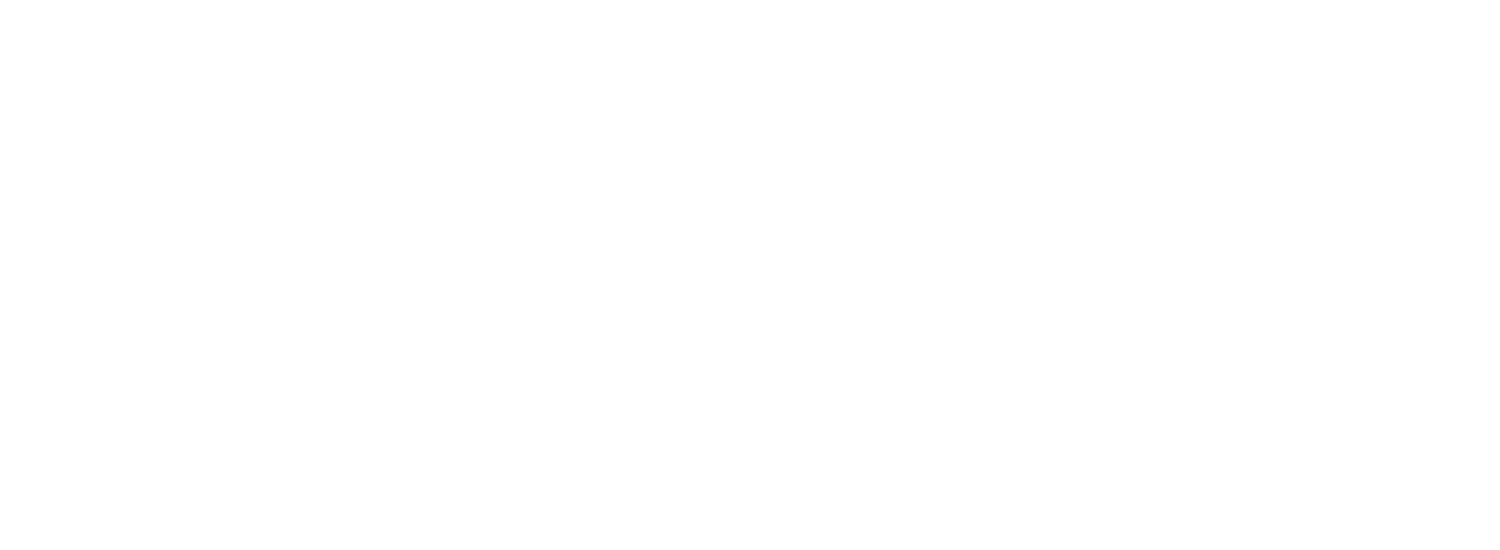

In [ ]:
mixedPoints_results_reg= results[results['Mode'].str.contains('mixedPoints_reg')].assign(Mode_OP = lambda x: x.Mode + x.Operation)
mixedPoints_results_reg['Percentage'] = mixedPoints_results_reg['Mode'].str.extract('(\d+)', expand=False)


mixedPoints_results_irreg = results[results['Mode'].str.contains('mixedPoints_irreg')].assign(Mode_OP = lambda x: x.Mode + x.Operation)
mixedPoints_results_irreg['Percentage'] = mixedPoints_results_irreg['Mode'].str.extract('(\d+)', expand=False)


# [['TargetDatabase','Mode','Operation','Latency','ApprxMBpS','ValuePoints']
#        ].loc[results['Mode']==['mixedPoints_regular','mixedPoints_irregular'] ]



# General overview and mean values across BS CN DIM ...



## grouped boxplot

import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")


plt.figure("MP-R").set_figwidth(15)
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Percentage", y="Latency",
            hue="DB_Mode", palette=["m", "g","b","r","y","w"],
            data=mixedPoints_results_reg)
sns.despine(offset=10, trim=True)
plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Regular Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig('./mixedP-groupedBP-R.pdf', format='pdf')
plt.show()




plt.figure("MP-IR").set_figwidth(15)

sns.boxplot(x="TargetDatabase", y="Latency",
            hue="Mode_OP", palette=["m", "g","b","r","y","w"],
            data=mixedPoints_results_irreg)
sns.despine(offset=10, trim=True)
plt.title("Average (Across All Ingestion Configs) Latency For All Workloads On Regular Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig('./mixedP-groupedBP-IR.pdf', format='pdf')
plt.show()




mixedPoints_TOP_results = results[results['Mode'].str.contains('mixedPoints')].assign(Mode_OP = lambda x: x.Mode + x.Operation).merge(top_rates, how='right', on=['TargetDatabase','BatchSize','ClientsNumber'] )



plt.figure("MP-TOP_I").set_figwidth(15)

sns.boxplot(x="TargetDatabase", y="Latency",
            hue="Mode_OP", palette=["m", "g","b","r","y","w"],
            data= mixedPoints_TOP_results[mixedPoints_TOP_results['Operation'].str.contains('Ingestion')] )
sns.despine(offset=10, trim=True)
plt.title("TOP (Optimal Ingestion Config.) Latency For Ingestion Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig('./mixedP-TOP-I-groupedBP.pdf', format='pdf')
plt.show()


plt.figure("MP-TOP_Q").set_figwidth(15)

sns.boxplot(x="TargetDatabase", y="Latency",
            hue="Mode_OP", palette=["m", "g","b","r","y","w"],
            data= mixedPoints_TOP_results[mixedPoints_TOP_results['Operation'].str.contains('Query')] )
sns.despine(offset=10, trim=True)
plt.title("TOP (Optimal Ingestion Config.) Latency For Query Workloads On Both Reg. + Irreg. Data During Mixed Concurrent Equivalent Ingestion and Simple Retrieval Operations")

plt.savefig('./mixedP-TOP-Q-groupedBP.pdf', format='pdf')
plt.show()



## System Metrics

In [ ]:
# ok
#
#
#

# 
#
#
#
#






# OPTIONAL or OBSOLETE




## Batching Experiments (optional)
Compare the ingesiton performance of the TSDBs and to understand the relationship between the performance and batch size

### Using a single client

#### Batch Latency

In [ ]:
batching_1c = pd.read_csv("~/metrics-22-06/MWriteAll7.csv", sep=";" ,names = colnames)
# batching_1c['Date'] = pd.to_datetime(batching_1c['Date'], unit='ns')
batching_1c['Latency'] = pd.to_numeric(batching_1c['Latency'], errors = 'coerce')
# batching_1c  = batching_1c.loc[batching_1c['Latency'] > 0 ].loc[batching_1c["TargetDatabase"=="ClickhouseDB"]] 

fig, ax = plt.subplots(figsize=set_size('acm'),)
sns.boxplot(x="BatchSize", y="Latency", hue="Mode",
            showmeans=True, data=batching_1c, ax=ax, palette=modes, width=0.4, linewidth=0.5,
         fliersize=1 )


ax.set_yscale('log')

ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%d"))
ax.legend(**legend_kwargs)
ax.set_xlabel('Batch Size')
ax.set_ylabel('Ingestion Latency (in milliseconds)')
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='y', which='minor', labelsize=5)
ax.grid(True, which="both", axis='y')
# fig.tight_layout()
plt.show()
plt.savefig('~/batching.pdf', format='pdf')

NameError: name 'set_size' is not defined

### Batch Size = 10'000 and Numerous Clients

In [ ]:
batching_n = pd.read_csv("~/Metrics1-8.csv",sep=";" ,names = colnames)
batching_n['Latency'] = pd.to_numeric(batching_n['Latency'], errors = 'coerce')
batching_n  = batching_n.loc[batching_n['Latency'] > 0 ] 
# batching_n['Date'] = pd.to_datetime(batching_n['Date'], unit='ns')
fig, ax = plt.subplots(figsize=set_size('acm'),)

# sns.boxplot(x="SucceededDataPoints", y="Latency", hue="TargetDatabase",
#             showmeans=True, data=batching_1c, ax=ax, palette=databases,width=0.4,
#             color=color, fliersize=1,)
# def batch_ingestionrate(x):
#     duration = x['Date'].max() - x['Date'].min()
#     sum = x['SucceededDataPoints'].sum()
#     return pd.Series({'IngestionRate': sum / duration.total_seconds()})
# def batch_diff(x):
#     reg = x['Mode'].values["distinct_default"] 
#     ir = x['Mode'].values["distinct"]  
#     return pd.Series({'DifferenceIR-R': abs(reg-ir) })

batchn = batching_n.groupby(['Mode',"ClientsNumber", "BatchSize"]).median("Latency").reset_index()

sns.lineplot(x='ClientsNumber', y='Latency', hue='Modes', palette=modes, data=batchn, ax=ax, marker='o')
ax.legend(**legend_kwargs )

ax.set_xticks([1,2,4,8,16])
ax.set_xlabel('Clients Number')
ax.set_ylabel('Ingestion Latency MEDIAN')

# fig.tight_layout()
plt.show()
plt.savefig('~/clients.pdf', format='pdf')

KeyError: 'Latency'